# Проект «Прогнозирование числа стримов для музыкальных треков»

## Часть 2. Разведочный анализ данных (EDA). Визуализация

### 0. Приведите описание данных. Какие признаки количественные, категориальные, номинальные?

Датасет Spotify and Youtube взят с сайта Kaggle:  https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

В нашем распоряжении есть данные о популярности музыкальных треков на платформах Spotify и YouTube. Датасет содержит информацию о песнях, таких как название, исполнитель, формат релиза, а также метрику популярности - количество прослушиваний.

*   **Artist** - исполнитель трека (номинальный категориальный).
*   **Track** - название трека (номинальный категориальный).
*   **Album** - название альбома (номинальный категориальный).
*   **Album_type** - тип альбома (Single/Album/Compilation) (номинальный категориальный).
*   **Danceability** - танцевальность трека (0–1) (числовой, непрерывный).
Описывает, насколько подходит трек для танцев на основе сочетания музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность.
*   **Energy** - уровень энергии трека (0–1) (числовой, непрерывный). Описывает перцептивную меру интенсивности и активности. Обычно энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал имеет высокую энергию, в то время как прелюдия Баха имеет низкую оценку по шкале. Перцептивные характеристики, способствующие этому атрибуту, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию.
*   **Key** - тональность трека (0–11, где 0 = C, 1 = C#, …, 11 = B) (числовой, порядковый). Тональность, в которой находится трек. Целые числа сопоставляются с высотой тона с использованием стандартной нотации Pitch Class. Если тональность не обнаружена, значение равно -1.
*   **Loudness** - общая громкость трека (-60 до 0) в децибелах (числовой, непрерывный).
*   **Speechiness** - доля вокала в треке (0–1) (числовой, непрерывный). Определяет наличие произнесенных слов в треке. Чем более запись похожа на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов.
*   **Acousticness** - вероятность того, что трек является акустическим (0–1) (числовой, непрерывный).
*   **Instrumentalness** - вероятность того, что трек инструментальный (0–1) (числовой, непрерывный).
*   **Liveness** - вероятность того, что трек записан на живом выступлении (0–1) (числовой, непрерывный
*   **Valence** - “позитивность” трека (0 — грустный, 1 — радостный) (числовой, непрерывный). Описывает музыкальную «позитивность», передаваемую треком. Треки с высоким показателем звучат более позитивно (например, счастливые, веселые, эйфоричные), в то время как треки с низким показателем звучат более негативно (например, грустные, подавленные, злые).
*   **Tempo** - темп трека в ударах в минуту (BPM) (числовой, непрерывный).
*   **Duration_ms** - длительность трека в миллисекундах (числовой, дискретный)
*   **Stream** - общее количество прослушиваний на Spotify (числовой, дискретный).


Датасет состоит из 16 полей и 20718 строк.

In [ ]:
# запустим необходимые библиотеки

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# откроем файл с данными. Мы уже подобрали датасет и оставили необходимые для анализа поля в шаге 1.

try:
    spotify = pd.read_csv('/content/drive/MyDrive/Project_HSE/spotify_dataset.csv')
except:
    url = 'https://drive.google.com/uc?export=download&id=1jAZ7NzeBze_ltc_7IXd9_MTfQM4bTAOy'
    spotify = pd.read_csv(url)

In [ ]:
# посмотрим информацию о датасете и убедимся, что все загрузилось корректно

spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Stream            20142 non-null  float64
dtypes: float64(12), object(4)
memory usage: 

In [ ]:
# посмотрим первые 5 строк

spotify.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,6.172597e+08


In [ ]:
# приведем названия полей к одному виду

spotify.columns = spotify.columns.str.lower().str.replace(' ', '_')
spotify.head()

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,6.172597e+08


Теперь с данными работать удобнее.

### 1. Есть ли пропуски в данных? Какой процент они составляют от числа строк? Почему они могли появиться? Если есть пропуски, выберите способ обработки пропусков для каждого столбца. Расскажите, почему выбрали именно этот способ. Обработайте пропуски.

In [ ]:
#посчитаем количество пропусков в данных и их долю

spotify_null = spotify.isnull().sum().sort_values(ascending = False).reset_index()
spotify_null['share'] = round(spotify_null[0]/len(spotify), 5)*100
spotify_null = spotify_null.rename(columns={'index': 'variable', 0: 'count'})
spotify_null

,variable,count,share
0,stream,576,2.78
1,loudness,2,0.01
2,energy,2,0.01
3,key,2,0.01
4,acousticness,2,0.01
5,instrumentalness,2,0.01
6,speechiness,2,0.01
7,danceability,2,0.01
8,liveness,2,0.01
9,valence,2,0.01


Всего у нас есть пропуски в 12 количественных переменных, самое большое число пропусков в столбце `stream` - 576, в остальных столбцах () - по 2 пропуска. В столбцах `danceability`, `energy`, `key`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo` и `duration_ms` по 2 пропуска, это 0.0001% от всех данных, такие строки можно удалить.

Так как в столбце `stream` находится наша целевая переменная, а количество пропусков незначительное, то удалим эти строки тоже.

Но для начала проверим распределение по категориальным признакам: если при удалении строк с пропущенными данными распределение не приведёт к существенному смещению показателей, то для дальнейшего корректного построения модели следует удалить строки с пропусками в данных. В качестве примера рассмотрим категориальную переменную `album_type`.

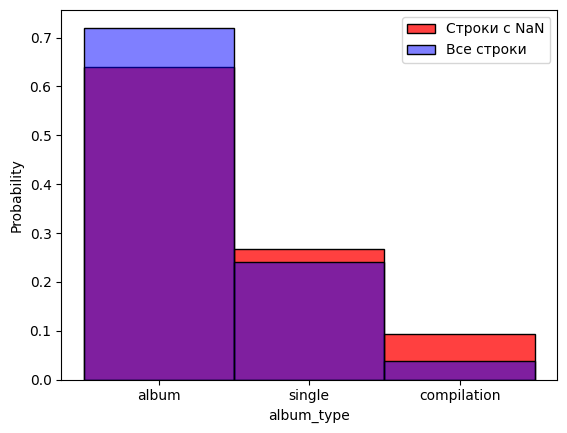

In [ ]:
# построим столбчатую гистограмму, которая показывает распределение типов альбомов (album_type) в нашем наборе данных

sns.histplot(spotify[spotify.isnull().any(axis=1)].album_type, stat="probability", label='Строки с NaN', color='red')
sns.histplot(spotify.album_type, stat="probability", alpha=0.5, label= 'Все строки', color='blue')

plt.legend()
plt.show()

Распределение по категориальному признаку `album_type` показало, что удаление данных с пропусками существенно не повлияет на общие показатели. Удалим строки с пропусками.

In [ ]:
# удалим пропущенные значения в столбцах и посмотрим общее число получившихся строк

spotify.dropna(inplace=True)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20140 entries, 0 to 20717
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            20140 non-null  object 
 1   track             20140 non-null  object 
 2   album             20140 non-null  object 
 3   album_type        20140 non-null  object 
 4   danceability      20140 non-null  float64
 5   energy            20140 non-null  float64
 6   key               20140 non-null  float64
 7   loudness          20140 non-null  float64
 8   speechiness       20140 non-null  float64
 9   acousticness      20140 non-null  float64
 10  instrumentalness  20140 non-null  float64
 11  liveness          20140 non-null  float64
 12  valence           20140 non-null  float64
 13  tempo             20140 non-null  float64
 14  duration_ms       20140 non-null  float64
 15  stream            20140 non-null  float64
dtypes: float64(12), object(4)
memory usage: 2.6+ 

**Вывод:**

Для проверки удаления пропусков, мы сделали распределение по категориальному признаку, чтобы понимать, как это действие может повлиять на данные признаки. Сильное влияние обнаружено не было, поэтому мы удалили **576 пропусков**, которые составляли 3% от общего числа строк.

Эти пропуски могли появиться по нескольким **причинам:**

1.   Spotify может не предоставлять данные о прослушиваниях для всех песен, особенно для менее популярных или более старых треков.

2.   Возможно, есть региональные ограничения, из-за которых данные о прослушиваниях не собираются в некоторых странах.

3.  Также возможно, что некоторые песни просто не были доступны для прослушивания на Spotify в определенные периоды времени.

4.  Ошибки при сборе данных: возможно, произошли сбои в процессе сбора информации с API Spotify.

5.  Изменения в API Spotify: Spotify мог изменить способ предоставления данных о прослушиваниях, что могло привести к пропускам в ранее собранных данных.

6.  Spotify может не раскрывать точные цифры прослушиваний для некоторых песен из-за соглашений с лейблами или артистами.

7.  Возможно, существуют ограничения на доступ к данным о прослушиваниях для определенных типов аккаунтов или регионов.

### 2. Соответствуют ли типы данных в датасете тем, которые нужны (например, есть ли возраст в формате строки)? Исправьте это, если да.

In [ ]:
# посмотрим типы данных

spotify.dtypes

,0
artist,object
track,object
album,object
album_type,object
danceability,float64
energy,float64
key,float64
loudness,float64
speechiness,float64
acousticness,float64


Все данные соответствуют своему типу, но для удобства анализа и последующих математических действий приведем поле длительность поля `duration_ms` из миллисекунд в минуты:

In [ ]:
# переведем данные в минуты

spotify['duration_min'] = spotify['duration_ms'] / 60000
spotify.drop(columns = 'duration_ms', inplace = True)

Также для точности можно перевести `key` и `stream` из float в int, так как эти переменные не принимают дробных значений. Проверим, действительно ли эти числа на самом деле целые.

Если число является целым, то остаток от деления на 1 всегда равен 0.

In [ ]:
# проверяем на целочисленность

spotify.query('key % 1 != 0 or stream % 1 != 0')[['key', 'stream']]

,key,stream


Проверка показала, что в этих столбцах действительно содержатся целые значения, поэтому их можно привести к целочисленному виду.

In [ ]:
# меняем тип данных на int

spotify[['key', 'stream']] = spotify[['key', 'stream']].astype(int)
spotify.sample(5)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
10175,The Cars,You're All I've Got Tonight,The Cars,album,0.583,0.855,11,-7.972,0.0404,0.00417,0.144000,0.237,0.664,122.425,14966453,4.245117
6662,Kris Kristofferson,Roll Me Up and Smoke Me When I Die - Live,Willie Nelson American Outlaw (Live),compilation,0.427,0.813,0,-9.020,0.0737,0.07130,0.109000,0.873,0.344,106.859,9999321,2.237783
20452,DVRST,SHE IS HYPERACTIVE,SHE IS HYPERACTIVE,single,0.613,0.835,6,-4.651,0.1120,0.07520,0.023700,0.164,0.426,174.022,3710358,2.298850
7591,Four Tops,It's The Same Old Song,Four Tops Second Album,album,0.704,0.678,2,-9.121,0.0295,0.14300,0.000000,0.119,0.977,125.185,39805413,2.773333
6807,Engenheiros Do Hawaii,Infinita Highway,A Revolta Dos Dandis,album,0.654,0.798,9,-9.130,0.0332,0.35400,0.000089,0.136,0.812,138.430,23504221,6.201550


In [ ]:
# посмотрим на типы данных после обработки

spotify.dtypes

,0
artist,object
track,object
album,object
album_type,object
danceability,float64
energy,float64
key,int64
loudness,float64
speechiness,float64
acousticness,float64


**Вывод:**

Таким образом, все поля в датасете соответствовали своим типам, но мы решили улучшить типы данных части полей и привести к целочисленным значениям для дальнейшего удобства анализа.

### 3. Посчитайте описательные статистики по всем переменным.

К основным описательным статистикам относятся:

*   **Среднее (mean)**: среднее значение.
*   **Медиана (median)**: значение, разделяющее данные пополам.
*   **Стандартное отклонение (std)**: мера разброса данных вокруг среднего.
*   **Минимум (min)**: наименьшее значение.
*   **Максимум (max)**: наибольшее значение.
*   **Квартили (25%, 50%, 75%)**: значения, делящие данные на четыре равные части.
*   **Количество (count)**: число значений в колонке.
   

Для категориальных переменных можно посчитать количество уникальных значений и частоту их появления.

Посмотрим описательные статистики с помощью describe()

#### 3.1 Описательные статистики числовых переменных

In [ ]:
# описательная статистика числовых данных

spotify.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
count,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,2.014000e+04,20140.000000
mean,0.620460,0.635153,5.290318,-7.644976,0.095312,0.291900,0.055457,0.192971,0.529521,120.628974,1.359430e+08,3.740613
std,0.165506,0.214007,3.577017,4.633981,0.106977,0.286446,0.192882,0.167876,0.245295,29.601307,2.441441e+08,2.096906
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,6.574000e+03,0.516417
25%,0.519000,0.507000,2.000000,-8.794000,0.035700,0.045400,0.000000,0.094175,0.339000,96.994000,1.767260e+07,2.998575
50%,0.638000,0.666000,5.000000,-6.515000,0.050600,0.194000,0.000002,0.125000,0.537000,119.965000,4.967698e+07,3.553083
75%,0.741250,0.798000,8.000000,-4.922000,0.104000,0.477000,0.000427,0.236000,0.726000,139.952250,1.383525e+08,4.200000
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,3.386520e+09,77.934300


**Проанализируем каждую переменную:**

*Числовые переменные*

**1.   Danceability**

- Среднее значение 0.62, что говорит о том, что в среднем треки довольно танцевальные.
- Минимум 0, максимум 1, что соответствует описанию.
- Стандартное отклонение невелико (0.165), что указывает на то, что значения танцевальности не сильно отклоняются от среднего значения.
- Распределение танцевальности немного скошено влево. Медиана (0.638) немного больше среднего значения (0.62), что может указывать на небольшую отрицательную скошенность распределения.

**2.   Energy**

- В основном, треки обладают умеренной энергией. Среднее значение (0.635) и медиана (0.666) находятся в середине шкалы.
- Также имеет полный спектр значений от 0 до 1.
- Распределение энергии довольно широкое. Стандартное отклонение (0.214) указывает на значительную вариативность значений энергии.

**3. Key**

- Тональность распределена довольно равномерно. Среднее значение (5.29) и медиана (5.0) находятся примерно в середине диапазона возможных значений (0-11).
- Минимум 0, максимум 11, как и ожидалось.
- Стандартное отклонение (3.577) говорит о том, что значения тональности довольно сильно варьируются в наборе данных.

**4. Loudness**

- В основном, треки имеют умеренную громкость. Среднее значение (-7.6 дБ) и медиана (-6.5 дБ) находятся в середине диапазона.
- Минимальное значение -46.251 говорит о наличии очень тихих треков, а максимальное 0.92, о наличии очень громких.
- Стандартное отклонение 4.63, говорит о наличии довольно большого разброса громкости треков.
- Распределение громкости немного скошено влево. Медиана (-6.5 дБ) немного больше среднего значения (-7.6 дБ), что может указывать на небольшую отрицательную скошенность распределения.
- Изначально в описании датасета было указано, что данных параметр представлен от -60 до 0, а у нас есть максимальное значение 0.92, что может говорить об ошибке или об аномалии в данных.

**5. Speechiness**

- Большинство треков не являются речевыми. Среднее значение (0.095) и медиана (0.05) значительно ниже 0.66, что указывает на то, что большинство треков в наборе данных - это музыка, а не речь.
- Стандартное отклонение (0.107) говорит о том, что хотя большинство треков имеют низкую речевую составляющую, есть значительное количество треков с более высоким содержанием речи.
- Максимальное значение (0.964) показывает, что в наборе данных есть треки, которые почти полностью состоят из произнесенных слов. Это могут быть аудиокниги, подкасты, ток-шоу и т.д.
- Медиана (0.05) меньше среднего значения (0.095), что говорит о том, что распределение данных скошено вправо. Это означает, что большинство треков имеют низкую речевую составляющую, но есть небольшое количество треков с очень высокой речевой составляющей, которые "вытягивают" среднее значение вверх.

**6. Acousticness**

- Большинство треков не являются акустическими. Среднее значение (0.29) и медиана (0.19) значительно ниже 0.5, что указывает на то, что большинство треков в наборе данных - это электронная или инструментальная музыка.
- Максимальное значение (0.996) показывает, что в наборе данных есть треки, которые почти полностью акустические. Это могут быть классические произведения, фолк-музыка и т.д.

**7. Instrumentalness**

- Среднее значение 0.056, что говорит о том, что большинство треков не являются инструментальными.
- Максимальное значение 1, говорит о наличии полностью инструментальных композиций.
- Медиана (0.000002) намного меньше среднего значения (0.055), что говорит о том, что распределение данных сильно скошено вправо. Это означает, что большинство треков имеют очень низкую инструментальность. Значит, учитывая данные по Acousticness, можно предположить, что большая часть треков - это электронная музыка или вокал.

**8. Liveness**

- Среднее значение (0.193) и медиана (0.125) значительно ниже 0.5, что говорит о том, что большинство треков не являются записями живых выступлений, они записаны в студии.

**9. Valence**

- Среднее значение 0.53, что говорит о том, что в среднем треки имеют нейтральную или слегка позитивную окраску

**10. Tempo**

- Среднее значение (120.63 BPM) и медиана (119.97 BPM) находятся в диапазоне, который можно считать умеренным для большинства музыкальных жанров.
- Также есть нулевые значения темпа, что похоже на аномалию, так как стандартные треки обычно содержат в себе темп.

**11. Duration_ms**

- Средняя длительность трека около 3.74 минут и она находится в диапазоне популярных песен. Среднее значение (3.74 минуты) и медиана (3.55 минуты) соответствуют типичной длительности песен, которые часто звучат на радио или в стриминговых сервисах.
- Максимальная длительность около 77 минут, говорит о наличии очень длинных композиций. Такое значение для нас является аномалией.

**12. Stream**

- Огромный разброс значений. Набор данных содержит треки с очень разным количеством прослушиваний, от нескольких тысяч до нескольких миллиардов.
- Максимальное значение (более 3 миллиардов) указывает на наличие треков, которые стали настоящими хитами на Spotify.

В целом у многих числовых признаков наблюдаются большие различия между средним и медианным значениями:

- `loudness`: -7.645 и -6.51

- `speechiness`: 0.09 и 0.05

- `instrumentalness`: 0.055 и 0.000002

- `duration_min`: 3.74 и 3.55

- `stream`: 135943000 и 49676980

Это может говорить о том, что в этих столбцах есть аномальные значения.

#### 3.2 Описательные статистики категориальных переменных

In [ ]:
# уникальные значения категориальных данных

for col in spotify[['artist', 'track', 'album', 'album_type']]:
    unique_count = spotify[col].nunique()
    print(f'\nКоличество уникальных значений в {col}: {unique_count}')


Количество уникальных значений в artist: 2057

Количество уникальных значений в track: 17327

Количество уникальных значений в album: 11642

Количество уникальных значений в album_type: 3


*Категориальные переменные*

В эту категорию входят `artist`, `track`, `album`, `album_type`.

Исходя из анализа категориальных переменных, можно сказать следующее:

- Датасет отличается высокой степенью разнообразия музыкальных произведений, что подтверждается большим количеством уникальных исполнителей, треков и альбомов.
- Переменная 'Album_type' имеет всего 3 типа, что указывает на стандартизацию типов альбомов.
- Количество уникальных треков - 17327, а у нас сейчас 20140 строк, что может говорить о дубликатах в данных.

**Вывод:**

Проанализировав описательные статистики числовых и категориальных данных, мы можем сказать, что уже видны аномальные значения, выбросы и, возможно, дубликаты, в нашем датасете.

Так, мы выявили, что есть очень длинные треки с большим количеством слов и малым темпом и танцевальностью, что может быть подкастами или аудиокнигами, что не подходит для нашей выборки.

В целом, датасет содержит разнообразные треки с точки зрения танцевальности, энергии, громкости, вокала, акустики, инструментальности, живости, позитивности, темпа и длительности.

### 4. Изучите каждый признак. Какие значения он принимает?
- для числовых признаков - диапазон значений
- для категориальных - уникальные значения

#### 4.1 Значения числовых признаков

In [ ]:
# выведем диапазон значений

spotify.describe().loc[['max', 'min']]

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
max,0.975,1.00000,11.0,0.920,0.964,0.996000,1.0,1.0000,0.993,243.372,3.386520e+09,77.934300
min,0.000,0.00002,0.0,-46.251,0.000,0.000001,0.0,0.0145,0.000,0.000,6.574000e+03,0.516417


**`danceability`, `energy`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`** по смыслу являются коэффициентами, лежащими в диапазоне от 0 до 1. В нашей выборке диапазон значений следующий:

   * **danceability** - [0, 0.975]
   * **energy** - [0.00002, 1]
   * **speechiness** - [0, 0.964]
   * **acousticness** - [0.000001, 0.996]
   * **instrumentalness** - [0, 1]
   * **liveness** - [0.0145, 1]
   * **valence** - [0, 0.993]

**`key`** - это корневая нота тональности композиции, обозначается числовым значением от 0 до 11 включительно, начиная с С ("до") и заканчивая B ("си"):

* **key** - [0, 11]

**`tempo`** - темп в ударах в минуту (BPM). Гипотетически может принимать любое положительное значение:

* **tempo** - [0, 243.372] - присутствуют странности в виде нулевых значений, предположительно выбросы.

**`duration_min`** - продолжительность композиции в минутах, гипотетически может принимать любое положительное значение:

* **duration_min** - [0.516417, 77.934300] - минимальное значение около 31 секунды, максимальное около 1.5 часов, предположительно выброс

**`loudness`** - громкость композиции в децибелах (db), обычно находится в диапазоне от -60 дБ до 0 дБ:

* **loudness** - [-46.251, 0.92]

**`stream`** - количество прослушиваний композиции на Spotify:

* **stream** - [6 574, 3 386 520 288]

#### 4.2 Значения категориальных признаков

In [ ]:
# уникальные значения категориальных данных

for col in spotify[['artist', 'track', 'album', 'album_type']]:
    unique_count = spotify[col].nunique()
    print(f'\nКоличество уникальных значений в {col}: {unique_count}')


Количество уникальных значений в artist: 2057

Количество уникальных значений в track: 17327

Количество уникальных значений в album: 11642

Количество уникальных значений в album_type: 3


In [ ]:
# выведем уникальные значения у типов альбомов

spotify['album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

**Вывод:**

Разброс числовых значений говорит о выбросах, например, наличие белого шума и аудиокниг, длина трека в 77 минут.
По количеству уникальных значений в `artist`, `track` и `album` пока сложно что-то сказать, но привлекает внимание переменная `album_type`, где среди типов альбомов присутствует *compilation* (объединение), что может нам не подходить.

Нужно детальнее обращаться к самим данным, чтобы удалить аномалии и выбросы, которые могут помешать дальнейшему анализу.

### 5. Есть ли в данных выбросы или ошибки (например, отрицательная цена)? Как вы их определяете? Обработайте выбросы.

Начнем с ручного просмотра данных, чтобы выявить потенциальные отклонения, а затем построим боксплоты, чтобы посмотреть, где еще есть выбросы или аномалии.

Ранее мы определяли, что у `loudness` значения выходят за границы диапазона [-60;0]. Выявим, сколько таких значений в нашем датасете:

In [ ]:
# значения, выходящие за границы

len(spotify[spotify['loudness']>0])

6

Таких значений 6, значит, их можно удалить безболезненно для датасета:

In [ ]:
# удаляем значения, находящиеся за границей

spotify = spotify[spotify['loudness']<=0]
print('min:', spotify['loudness'].min())
print('max:', spotify['loudness'].max())

min: -46.251
max: -0.007


В описании датасета указано, что переменная `speechiness` определяет наличие произнесенных слов в треке. Чем более запись похожа на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов.

Так как нам не нужны для анализа аудиокниги, посмотрим, сколько их и удалим:

In [ ]:
# значения speechiness больше 0.66

len(spotify[spotify['speechiness']>0.66])

84

Всего 84 строки со значением выше, чем 0.66, удалим их из датасета:

In [ ]:
# удалим значения выше 0.66

spotify = spotify[spotify['speechiness']<=0.66]
print('min:', spotify['speechiness'].min())
print('max:', spotify['speechiness'].max())

min: 0.0
max: 0.64


Также посмотрим значения, где `speechiness` равна 0.0:

In [ ]:
# значения speechiness, равные 0

spotify[spotify['speechiness'] == 0]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
2073,Louis Armstrong,"Hello, Dolly!","Hello, Dolly! (Remastered)",album,0.0,0.405000,0,-9.935,0.0,0.84200,0.00114,0.1980,0.0,0.0,22358910,2.450000
2871,The Alchemist,Arrival,Israeli Salad,album,0.0,0.802000,1,-7.977,0.0,0.00417,0.87800,0.6030,0.0,0.0,9283211,1.582783
7187,Luciano Pavarotti,"Rigoletto / Act 3: ""La donna è mobile"" - Live",The Three Tenors - The Best of the 3 Tenors,compilation,0.0,0.402000,5,-15.718,0.0,0.97200,0.00545,0.8970,0.0,0.0,1995393,2.520883
8373,M83,Adieux,You And The Night,album,0.0,0.105000,7,-13.925,0.0,0.98900,0.95700,0.1080,0.0,0.0,3387203,1.080667
9266,Lang Lang,The Departure,Voyager - Essential Max Richter,album,0.0,0.036200,0,-22.519,0.0,0.99400,0.94000,0.0958,0.0,0.0,11902123,2.525117
9348,Ocean Sounds,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0,0.000252,9,-17.746,0.0,0.00948,0.87700,0.8060,0.0,0.0,54256600,1.557533
9358,Ocean Waves For Sleep,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0,0.000252,9,-17.746,0.0,0.00948,0.87700,0.8060,0.0,0.0,54256600,1.557533
13839,White Noise for Babies,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.003420,8,-28.460,0.0,0.79100,1.00000,0.1110,0.0,0.0,956435715,1.503800
13840,White Noise for Babies,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.001250,1,-27.592,0.0,0.90800,1.00000,0.1110,0.0,0.0,128701242,1.203717
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.000055,10,-21.995,0.0,0.92100,1.00000,0.1140,0.0,0.0,26677287,1.808783


Из данных видим, что первые 5 строк представляют собой классические произведения, когда как оставшиеся - это треки с белым шумом - White Noise Baby Sleep и Ocean Sounds. Их нужно удалить, так как они не подходят для нашего анализа. Будем смотреть по `artist` и `track`.

In [ ]:
# отфильтруем по наличию в названии слов "Ocean Sounds" и "White Noise"

spotify[
    (spotify['artist'].str.lower().str.contains('white noise|ocean sounds|sleepy penguin|ocean waves'))
    | (spotify['track'].str.lower().str.contains('white noise|ocean sounds|sleepy penguin|beach waves'))
]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
9346,Ocean Sounds,Rolling Ocean Waves,"Waves of the Sea, Ocean and Lakes",album,0.1270,0.941000,1,-16.083,0.0509,0.813000,0.988000,0.1780,0.00001,82.144,168277622,1.614533
9347,Ocean Sounds,Calm Sea Sounds,Loopable Ocean Sounds For Sleep,album,0.1710,0.995000,3,-24.270,0.0438,0.773000,0.989000,0.9670,0.00001,48.190,26550234,1.983333
9348,Ocean Sounds,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0000,0.000252,9,-17.746,0.0000,0.009480,0.877000,0.8060,0.00000,0.000,54256600,1.557533
9349,Ocean Sounds,Waves: Calm,Ocean Waves Sounds,album,0.2080,0.989000,1,-17.595,0.1090,0.135000,0.000561,0.4700,0.01540,118.485,45120628,0.935867
9350,Ocean Sounds,Ocean Sounds For Deep Sleep,Baby Sleep: Ocean Sounds,album,0.1500,0.984000,3,-19.366,0.0584,0.836000,0.986000,0.9470,0.00001,80.756,11578423,2.387500
9351,Ocean Sounds,White Noise Waves,Baby Sleep: Ocean Sounds,album,0.0738,0.352000,3,-15.778,0.0619,0.067300,0.995000,0.2940,0.01850,173.517,6090558,1.808333
9352,Ocean Sounds,Deep Pink Noise,Loopable Ocean Sounds For Sleep,album,0.1620,0.931000,7,-16.457,0.0700,0.501000,0.968000,0.3050,0.00987,127.834,7186349,3.083333
9353,Ocean Sounds,Ocean Binaural,50 Peaceful Ocean Waves,album,0.2110,0.993000,8,-18.613,0.0487,0.927000,0.960000,0.4970,0.00001,79.928,3766217,2.035300
9354,Ocean Sounds,Sleepy Sea Sounds,Baby Sleep: Ocean Sounds,album,0.1630,0.996000,2,-14.608,0.0609,0.473000,0.969000,0.8590,0.00001,112.953,8072713,2.675000
9355,Ocean Sounds,Beach Sounds,Relaxing Beach Sounds,album,0.1140,0.663000,9,-27.070,0.0836,0.345000,0.592000,0.7500,0.01530,94.197,2595488,3.866550


Видим, что, действительно, такие треки нам не подходят, и их немного в выборке (50), поэтому удалим.

In [ ]:
# удалим треки с белым шумом

spotify = spotify.drop(spotify[
    (spotify['artist'].str.lower().str.contains('white noise|ocean sounds|sleepy penguin|ocean waves'))
    | (spotify['track'].str.lower().str.contains('white noise|ocean sounds|sleepy penguin|beach waves'))].index)

# проверим, как отработало удаление

spotify[(spotify['artist'] == 'white noise')]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min


Ранее мы выявляли, что в `album_type` есть тип "compilation", т.е. объединение треков. Посмотрим данные с таким типом чуть подробнее.

In [ ]:
# также помимо типа альбома отберем треки, где продолжительность больше 7 минут, так как средняя продолжительность трека примерно 3 минуты, возьмем немного с запасом - 7 минут

spotify[(spotify['album_type'] == 'compilation') & (spotify['duration_min'] >= 7)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
1915,Kishore Kumar,Janu Meri Jaan - Shaan / Soundtrack Version,King of Melody - R. D. Burman - Love is in the...,compilation,0.4920,0.4860,9,-10.320,0.0558,0.673000,0.000006,0.2380,0.7830,134.353,11086820,7.108450
2943,Guru Randhawa,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,52 Non Stop Dilbar Dilbar Remix,compilation,0.5210,0.8370,7,-4.501,0.0794,0.059300,0.000013,0.1570,0.4800,106.001,23128326,76.358050
2983,Amaal Mallik,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,52 Non Stop Dilbar Dilbar Remix,compilation,0.5210,0.8370,7,-4.501,0.0794,0.059300,0.000013,0.1570,0.4800,106.001,23128326,76.358050
3397,Asha Bhosle,Janu Meri Jaan - Shaan / Soundtrack Version,King of Melody - R. D. Burman - Love is in the...,compilation,0.4920,0.4860,9,-10.320,0.0558,0.673000,0.000006,0.2380,0.7830,134.353,11086820,7.108450
3467,S. Janaki,Sundari,Spb & S Janaki - Tamil Hits Vol-1,compilation,0.6120,0.4060,8,-9.907,0.0315,0.725000,0.000008,0.1020,0.3900,113.606,14501234,7.207617
3929,Mohammed Rafi,Janu Meri Jaan - Shaan / Soundtrack Version,King of Melody - R. D. Burman - Love is in the...,compilation,0.4920,0.4860,9,-10.320,0.0558,0.673000,0.000006,0.2380,0.7830,134.353,11086820,7.108450
3992,Sadhana Sargam,Salaam-E-Ishq,Soulful Sonu Nigam Specials,compilation,0.7630,0.7960,8,-7.095,0.0545,0.036200,0.000052,0.2480,0.7570,103.025,12603421,7.076217
4785,Howard Shore,"The Breaking of the Fellowship (feat. ""In Drea...",The Lord of the Rings: The Fellowship of the R...,compilation,0.1310,0.1370,2,-20.553,0.0387,0.934000,0.485000,0.0870,0.0465,78.577,63575826,7.346667
4896,Mika Singh,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,52 Non Stop Dilbar Dilbar Remix,compilation,0.5210,0.8370,7,-4.501,0.0794,0.059300,0.000013,0.1570,0.4800,106.001,23128326,76.358050
4926,Himesh Reshammiya,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,52 Non Stop Dilbar Dilbar Remix,compilation,0.5210,0.8370,7,-4.501,0.0794,0.059300,0.000013,0.1570,0.4800,106.001,23128326,76.358050


Из данных видно, что все 35 строк - это сборники нескольких песен одного исполнителя или заставки из фильмов или тематические сборники (Halloween) и т.д. Все это может повилиять на результаты нашего исследования, поэтому удалим такие данные.

In [ ]:
# удалим данные, где тип альбома compilation и длительность трека более 7 минут

spotify = spotify[(spotify['album_type'] != 'compilation') & (spotify['duration_min'] <= 7)]

# проверим данные

spotify[(spotify['duration_min'] == 7)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min


На предыдущем этапе мы отмечали, что есть большая разница между средним и медианой. Посмотрим, как выглядят данные сейчас после ручной чистки:

In [ ]:
# описательные статистики

spotify.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
count,18964.000000,18964.000000,18964.000000,18964.000000,18964.000000,18964.000000,18964.000000,18964.000000,18964.000000,18964.000000,1.896400e+04,18964.000000
mean,0.625185,0.638811,5.301466,-7.473660,0.092423,0.286553,0.051369,0.191009,0.532430,120.949141,1.396806e+08,3.609492
std,0.161681,0.211023,3.578336,4.452725,0.093581,0.283485,0.184639,0.165118,0.243231,29.342292,2.493771e+08,0.938299
min,0.000000,0.001440,0.000000,-44.761000,0.000000,0.000002,0.000000,0.014500,0.000000,0.000000,6.574000e+03,0.516417
25%,0.524000,0.513000,2.000000,-8.605000,0.035700,0.043900,0.000000,0.094000,0.342000,97.097000,1.798940e+07,2.986517
50%,0.642000,0.669000,5.000000,-6.428000,0.050600,0.188000,0.000002,0.124000,0.539000,119.987000,5.106038e+07,3.532217
75%,0.744000,0.799000,8.000000,-4.874750,0.104000,0.469000,0.000371,0.234000,0.727000,139.969000,1.426371e+08,4.139837
max,0.975000,1.000000,11.000000,-0.007000,0.640000,0.996000,0.992000,1.000000,0.993000,243.372000,3.386520e+09,6.998217


Видим, что разница между средним и медианой сохраняется у `loudness` (-7.47 и -6.43), `instrumentalness` (0.05 и 0.000002), а также у `stream`.

По переменной `stream` можно сказать, что такая разница может быть из-за очень популярных треков.

Построим боксплоты и посмотрим, как ведут себя данные:

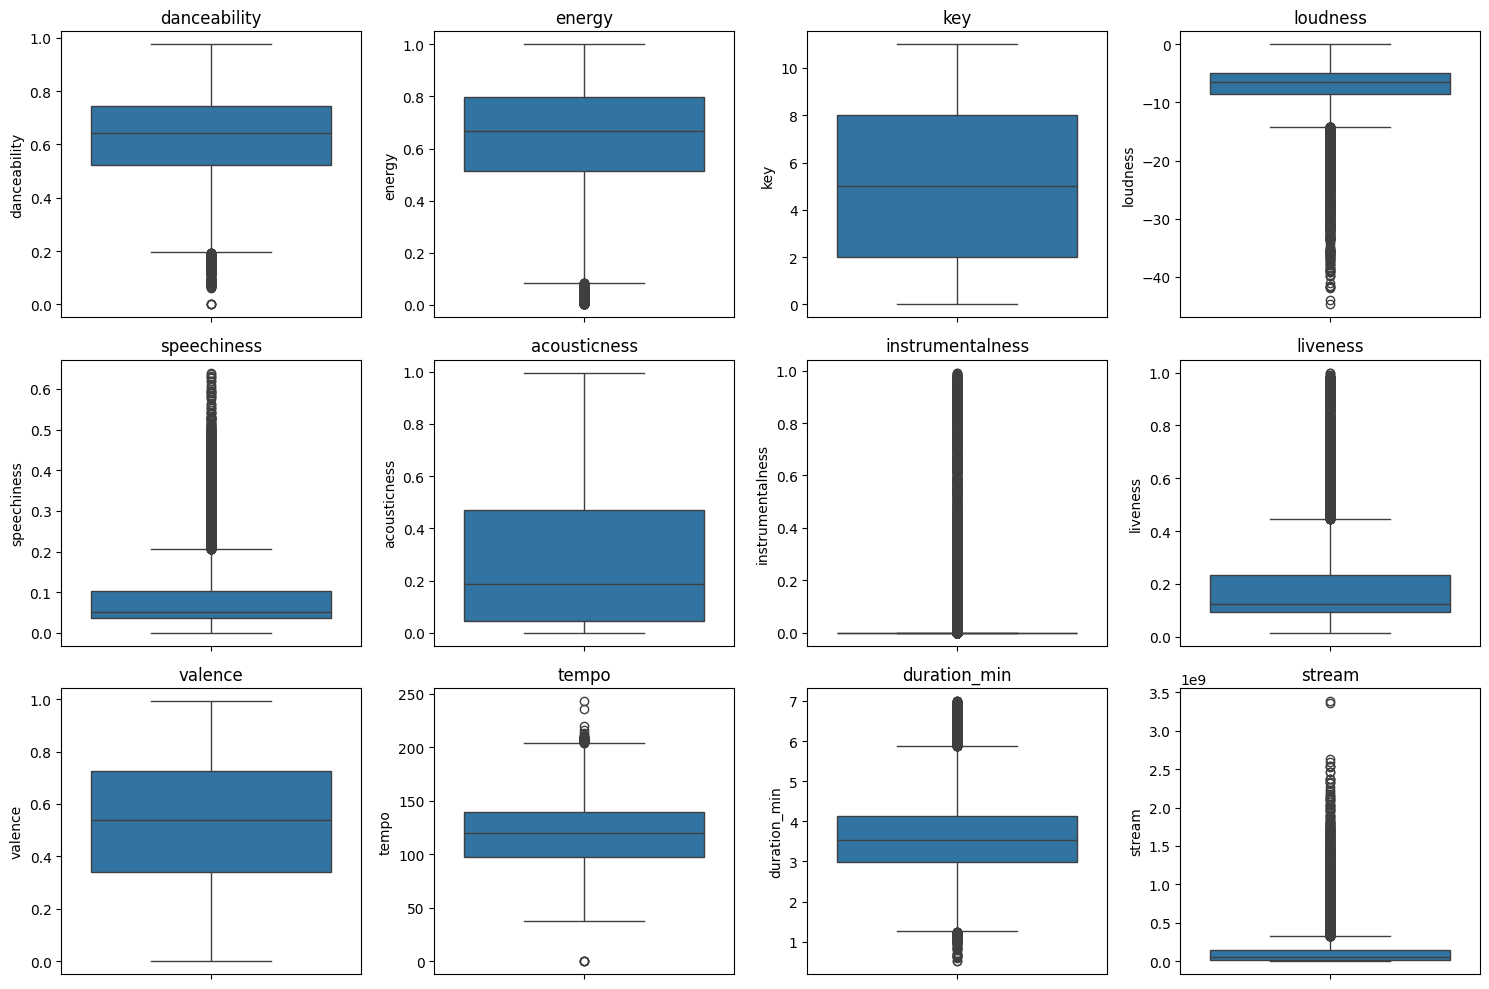

In [ ]:
# добавим в переменную все числовые значения

spotify_numeric = spotify[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min', 'stream']]

#построим боксплот

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(spotify_numeric.columns):
    sns.boxplot(y=spotify_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Исходя из данных, видим, что есть еще интересные кейсы, которые стоит проверить более детально, например, `loudness` (значения меньше -15), `speechiness` (значения больше 0.2), `liveness` (значения больше 0.5), `tempo` (значения с 0 и выше 220).

In [ ]:
# значения loudness меньше 15

spotify[(spotify['loudness'] <= -15)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
211,Elvis Presley,Blue Christmas,Elvis' Christmas Album,album,0.4650,0.270,4,-16.661,0.0425,0.900000,0.001040,0.145,0.58000,94.518,293604060,2.152883
212,Elvis Presley,Here Comes Santa Claus (Right Down Santa Claus...,Elvis' Christmas Album,album,0.5750,0.236,2,-16.982,0.0422,0.968000,0.017800,0.105,0.82900,79.576,115786722,1.930450
218,Elvis Presley,In the Ghetto,From Elvis in Memphis,album,0.4040,0.266,10,-16.688,0.0334,0.716000,0.133000,0.107,0.49100,88.916,138978979,2.790217
264,Fleetwood Mac,Landslide,Fleetwood Mac,album,0.4140,0.161,7,-22.320,0.0318,0.883000,0.000223,0.117,0.42300,159.375,512338633,3.324883
281,Frank Sinatra,Have Yourself A Merry Little Christmas - Remas...,A Jolly Christmas From Frank Sinatra,album,0.2620,0.137,8,-15.235,0.0344,0.913000,0.000007,0.267,0.28800,92.183,126469786,3.443333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20584,Rain Fruits Sounds,"Rain and Thunderstorm, Pt. 34",Rain and Thunderstorm,album,0.3090,0.807,10,-23.990,0.0957,0.000093,0.981000,0.362,0.03390,95.429,15655571,0.633333
20585,Rain Fruits Sounds,"Rain and Thunderstorm, Pt. 7",Rain and Thunderstorm,album,0.2530,1.000,9,-25.071,0.0966,0.169000,0.557000,0.365,0.00001,55.694,16377049,0.616667
20586,Rain Fruits Sounds,"Rain and Thunderstorm, Pt. 6",Rain and Thunderstorm,album,0.0712,1.000,3,-24.934,0.1150,0.276000,0.898000,0.944,0.00294,180.511,16125942,0.633333
20587,Rain Fruits Sounds,"Rain and Thunderstorm, Pt. 33",Rain and Thunderstorm,album,0.1530,1.000,8,-25.175,0.0758,0.153000,0.568000,0.363,0.00001,134.878,15651305,0.650000


Из данных видим, что у нас еще остались выбросы, которые нам не нужны - это треки со звуками дождя и треки длительностью менее минуты. Посмтрим, сколько таких строк получится:

In [ ]:
# выявим треки с белым шумом и длительностью менее 1 минуты

spotify[
    (spotify['artist'].str.lower().str.contains('rain fruits sounds')) \
    | (spotify['track'].str.lower().str.contains('rain fruits sounds')) \
    | (spotify['duration_min'] <= 1)
]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
1987,Benjamin Blümchen,Benjamin Blümchen Lied,Folge 1: als Wetterelefant,album,0.8190,0.32500,11,-14.801,0.0699,0.604000,0.000000,0.6050,0.96900,120.031,44446702,0.816300
4287,Johannes Brahms,"16 Waltzes, Op. 39 (1867 version): No. 3 in G-...",Brahms: Waltzes / Cadenzas / Die Schone Magelone,album,0.2870,0.00703,8,-41.696,0.0518,0.995000,0.909000,0.0997,0.69300,124.244,5532251,0.870000
7218,John Powell,"Goodnight Sweet Possums - From ""Ice Age The Me...",Ice Age: The Meltdown (Original Motion Picture...,album,0.1610,0.04590,6,-29.584,0.0372,0.678000,0.005840,0.1480,0.15200,70.074,14278589,0.807767
8676,LMFAO,Rock The BeaT,Party Rock,album,0.8930,0.71600,0,-6.907,0.0960,0.301000,0.000286,0.2000,0.06910,128.013,3447302,0.906217
9170,Raffi,Baa Baa Black Sheep,Singable Songs for the Very Young,album,0.8810,0.05170,7,-17.122,0.1070,0.846000,0.000000,0.1660,0.70200,122.397,13754307,0.992000
9411,I Monster,Sickly Suite Part Three: Gone,A Dense Swarm of Ancient Stars,album,0.2740,0.11300,2,-22.474,0.0442,0.075200,0.225000,0.4420,0.48000,83.789,557711,0.962667
9678,DJ Khaled,NO SECRET (feat. Drake),GOD DID,album,0.3980,0.62600,1,-4.164,0.0367,0.195000,0.000025,0.1600,0.04040,106.733,27444245,0.789233
11186,Michael Giacchino,Mission: Impossible Theme,Mission: Impossible III (Music From The Origin...,album,0.2990,0.57100,5,-8.949,0.0395,0.318000,0.137000,0.0452,0.76400,89.642,25985235,0.863333
11267,José González,Skateboard Delivery,The Secret Life of Walter Mitty (Original Moti...,album,0.5770,0.06560,10,-27.962,0.0377,0.951000,0.950000,0.1050,0.18100,120.118,1323909,0.991783
11268,José González,Walter Time,The Secret Life of Walter Mitty (Original Moti...,album,0.8260,0.10600,11,-24.467,0.0758,0.964000,0.727000,0.0956,0.05620,120.039,1982125,0.994000


В выборке находится 30 строк, которые содержат в себе короткие заставки, белый шум, удалим их, так как они помешают нам для дальнейшего анализа:

In [ ]:
# удалим ненужные данные

spotify = spotify.drop(spotify[
    (spotify['artist'].str.lower().str.contains('rain fruits sounds')) \
    | (spotify['track'].str.lower().str.contains('rain fruits sounds')) \
    | (spotify['duration_min'] <= 1)
].index)

Также были замечены поля, которые содержат в себе упоминание об аудиокнигах. Сделаем проверку на поск по словам:

In [ ]:
# проверка на аудиокниги

spotify[
    spotify['track'].str.lower().str.contains('teil')
    | spotify['track'].str.lower().str.contains('kapitel')
    | spotify['track'].str.lower().str.contains('folge')
]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
1334,Wolfgang Amadeus Mozart,"Die Hochzeit des Figaro, K. 492, 3. Akt: Canzo...",Mozart: Nozze Di Figaro (Le) (The Marriage of ...,album,0.313,0.144,2,-17.316,0.0368,0.944,0.92,0.181,0.3030,145.162,13093293,4.076000
1989,Benjamin Blümchen,Kapitel 07: auf Weltreise (Folge 150),Folge 150: auf Weltreise,album,0.486,0.878,10,-14.600,0.6370,0.627,0.00,0.721,0.0993,79.324,937637,1.603017
11721,Thomas Karallus,Drachenzähmen leicht gemacht - Teil 1,Drachenzähmen leicht gemacht (Das Original-Hör...,album,0.510,0.854,0,-9.007,0.5040,0.695,0.00,0.777,0.3400,118.461,366132,3.077733
12323,Teufelskicker,96 - Tausendundein Tor! - Teil 04,Folge 96: Tausendundein Tor!,album,0.692,0.700,10,-7.317,0.6290,0.218,0.00,0.133,0.7400,138.481,106871,3.067783
12326,Teufelskicker,96 - Tausendundein Tor! - Teil 09,Folge 96: Tausendundein Tor!,album,0.536,0.791,7,-6.036,0.5310,0.672,0.00,0.442,0.7250,74.253,103333,3.000883
12327,Teufelskicker,96 - Tausendundein Tor! - Teil 10,Folge 96: Tausendundein Tor!,album,0.510,0.691,8,-7.032,0.6000,0.320,0.00,0.460,0.7440,70.875,102027,3.060450
14199,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 01,Folge 81: Geheimnis im Spukhotel,album,0.683,0.688,10,-9.729,0.3850,0.157,0.00,0.243,0.4150,91.692,402462,3.082883
14201,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 03,Folge 81: Geheimnis im Spukhotel,album,0.578,0.425,8,-10.980,0.6190,0.377,0.00,0.136,0.5910,172.217,331370,3.049783
14207,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 09,Folge 81: Geheimnis im Spukhotel,album,0.580,0.431,10,-13.425,0.4500,0.322,0.00,0.460,0.3250,84.214,312052,3.007783
16447,CRO,Ein Teil,Raop,album,0.739,0.482,10,-6.414,0.1840,0.469,0.00,0.109,0.6710,98.958,61860981,2.924667


Первая и последний строки - это музыкальные треки, все остальное - это части аудиокниг, удалим эти строки:

In [ ]:
# отберем строки с предыдущими условиями и добавим еще одно, где переменная speechiness	 больше 0.4,
# чтобы выявить только аудиокниги и исключить классические произведения

spotify[
    spotify['track'].str.contains('teil|kapitel|folge', case=False) &
    (spotify['speechiness'] >= 0.4)
]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
1989,Benjamin Blümchen,Kapitel 07: auf Weltreise (Folge 150),Folge 150: auf Weltreise,album,0.486,0.878,10,-14.600,0.637,0.627,0.0,0.721,0.0993,79.324,937637,1.603017
11721,Thomas Karallus,Drachenzähmen leicht gemacht - Teil 1,Drachenzähmen leicht gemacht (Das Original-Hör...,album,0.510,0.854,0,-9.007,0.504,0.695,0.0,0.777,0.3400,118.461,366132,3.077733
12323,Teufelskicker,96 - Tausendundein Tor! - Teil 04,Folge 96: Tausendundein Tor!,album,0.692,0.700,10,-7.317,0.629,0.218,0.0,0.133,0.7400,138.481,106871,3.067783
12326,Teufelskicker,96 - Tausendundein Tor! - Teil 09,Folge 96: Tausendundein Tor!,album,0.536,0.791,7,-6.036,0.531,0.672,0.0,0.442,0.7250,74.253,103333,3.000883
12327,Teufelskicker,96 - Tausendundein Tor! - Teil 10,Folge 96: Tausendundein Tor!,album,0.510,0.691,8,-7.032,0.600,0.320,0.0,0.460,0.7440,70.875,102027,3.060450
14201,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 03,Folge 81: Geheimnis im Spukhotel,album,0.578,0.425,8,-10.980,0.619,0.377,0.0,0.136,0.5910,172.217,331370,3.049783
14207,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 09,Folge 81: Geheimnis im Spukhotel,album,0.580,0.431,10,-13.425,0.450,0.322,0.0,0.460,0.3250,84.214,312052,3.007783


In [ ]:
# удалим строки

spotify = spotify.drop(spotify[
    spotify['track'].str.contains('teil|kapitel|folge', case=False) &
    (spotify['speechiness'] >= 0.4)
].index)

Посмотрим значения `speechiness` (значения больше 0.2)

In [ ]:
# значения speechiness больше 0.2

spotify[
    (spotify['speechiness'] >= 0.2)
].tail()

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
20639,Arcane,Snakes (from the series Arcane League of Legends),Snakes (from the series Arcane League of Legends),single,0.421,0.842,1,-6.238,0.238,0.000397,0.001250,0.3790,0.366,157.877,39989002,2.689617
20640,Arcane,Dirty Little Animals (From the series Arcane L...,Dirty Little Animals (From the series Arcane L...,single,0.580,0.840,1,-6.385,0.332,0.033200,0.000000,0.4830,0.596,105.963,34726597,3.419817
20662,AYLIVA,Deine Schuld,Weisses Herz,album,0.681,0.612,1,-6.998,0.208,0.265000,0.000000,0.0868,0.396,170.179,39348059,3.075000
20678,Grupo Frontera,La Ladrona - En Vivo,"En Vivo, Vol.1",single,0.709,0.436,7,-11.939,0.221,0.138000,0.000034,0.1310,0.796,162.652,14595013,3.103150
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9,-4.004,0.419,0.356000,0.018400,0.1080,0.539,155.378,6873961,1.806450


Пока в данных нет чего-то необычного.

Посмотрим значения `liveness` (значения больше 0.5):

In [ ]:
# значения liveness большн 0.5

spotify[
    (spotify['liveness'] >= 0.5)
].head()

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6,-6.679,0.1770,0.00836,0.00233,0.613,0.772,138.559,1040234854,3.710667
9,Gorillaz,Dirty Harry,Demon Days,album,0.625,0.877,10,-7.176,0.1620,0.03150,0.08110,0.672,0.865,192.296,191074713,3.840433
61,Linkin Park,Numb,Meteora,album,0.496,0.863,9,-4.153,0.0381,0.00460,0.00000,0.639,0.243,110.018,1195213410,3.093117
63,Linkin Park,Numb / Encore,Numb / Encore: MTV Ultimate Mash-Ups Presents ...,single,0.687,0.793,2,-4.254,0.1660,0.06030,0.00000,0.582,0.751,107.045,778880225,3.428883
66,Linkin Park,Bleed It Out,Minutes to Midnight,album,0.529,0.967,1,-3.647,0.0508,0.11400,0.00000,0.610,0.596,140.127,388331061,2.772883


Тоже пока ничего необычного.

Посмотрим значения `tempo` (значения с 0 до 25 и выше 220):

In [ ]:
# значения tempo до 25

spotify[
    (spotify['tempo'] <= 25)
]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
2073,Louis Armstrong,"Hello, Dolly!","Hello, Dolly! (Remastered)",album,0.0,0.4050,0,-9.935,0.0,0.84200,0.00114,0.1980,0.0,0.0,22358910,2.450000
2871,The Alchemist,Arrival,Israeli Salad,album,0.0,0.8020,1,-7.977,0.0,0.00417,0.87800,0.6030,0.0,0.0,9283211,1.582783
8373,M83,Adieux,You And The Night,album,0.0,0.1050,7,-13.925,0.0,0.98900,0.95700,0.1080,0.0,0.0,3387203,1.080667
9266,Lang Lang,The Departure,Voyager - Essential Max Richter,album,0.0,0.0362,0,-22.519,0.0,0.99400,0.94000,0.0958,0.0,0.0,11902123,2.525117


In [ ]:
# значения tempo выше 220

spotify[
    (spotify['tempo'] > 220)
]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
4260,Riton,Chale (feat. Clementine Douglas),Chale (feat. Clementine Douglas),single,0.574,0.619,2,-6.741,0.1990,0.2030,0.00215,0.0901,0.473,236.059,1013601,2.652867
6006,J.J. Cale,Call The Doctor,Naturally,album,0.466,0.188,1,-18.309,0.0547,0.1980,0.65700,0.0820,0.615,243.372,12755638,2.453333
19489,YNW Melly,Mama Cry,I AM YOU,album,0.543,0.492,7,-7.432,0.1560,0.0739,0.00000,0.1100,0.107,220.099,227328015,3.854967


Пока также не обнаружено чего-то интересного. Построим боксплот вновь:

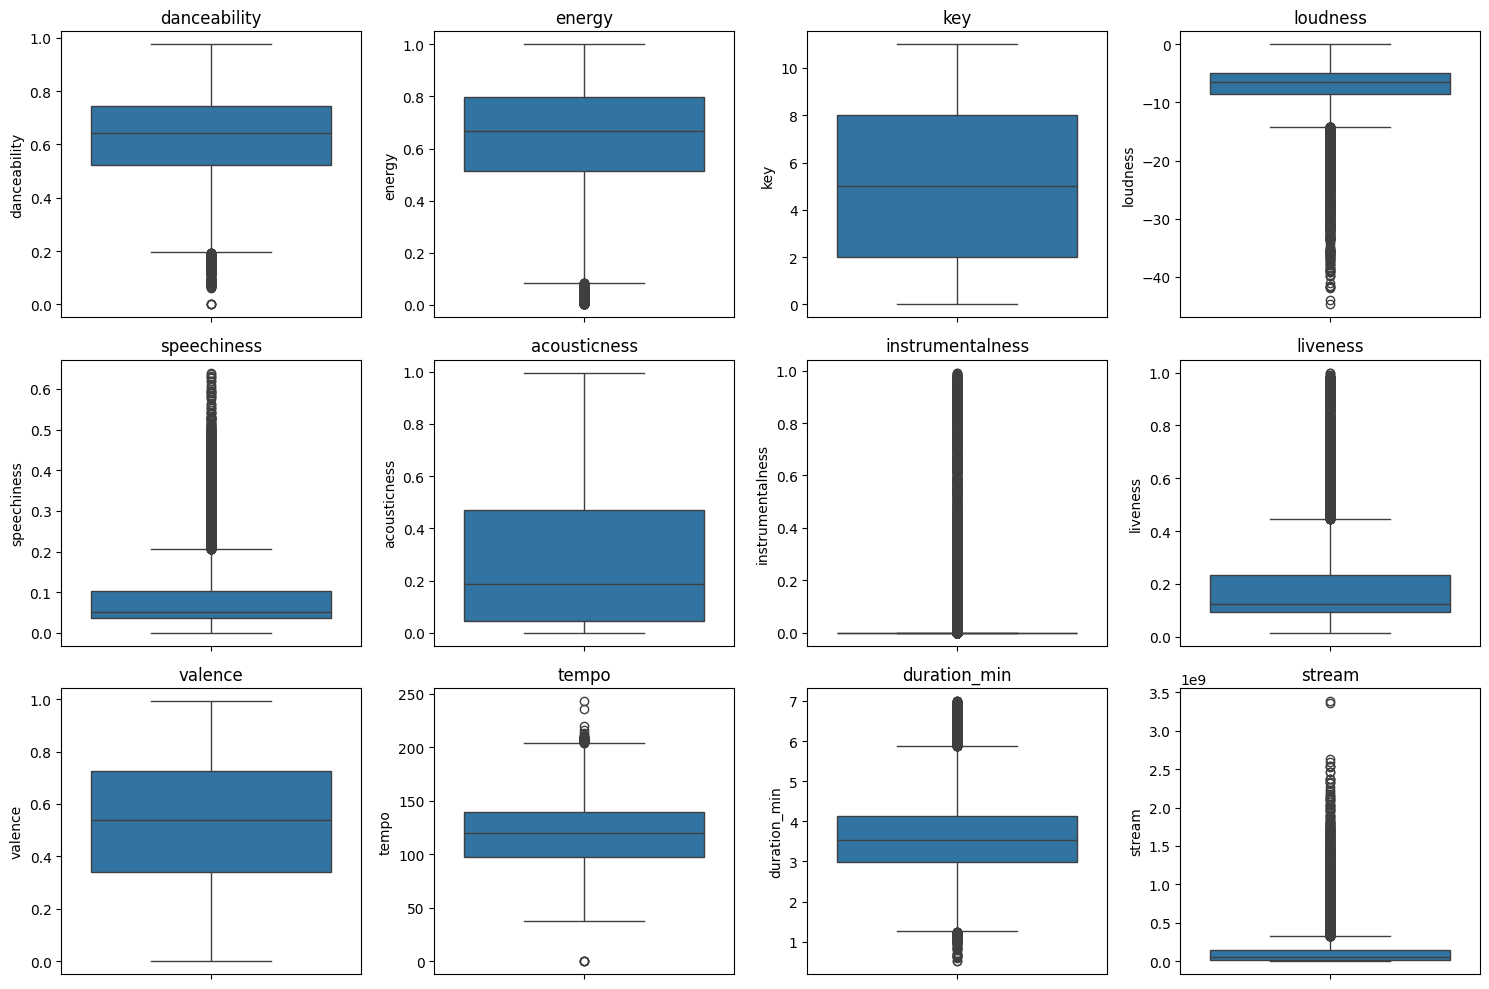

In [ ]:
#построим боксплот

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(spotify_numeric.columns):
    sns.boxplot(y=spotify_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
#посчитаем количество выбросов

def find_outliers_iqr(spotify_numeric, column):
    Q1 = spotify_numeric[column].quantile(0.25)
    Q3 = spotify_numeric[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = spotify_numeric[(spotify_numeric[column] < lower_bound) | (spotify_numeric[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

numeric_columns = spotify_numeric.columns

outlier_counts = []

for column in numeric_columns:
    num_outliers, lower_bound, upper_bound = find_outliers_iqr(spotify_numeric, column)
    outlier_counts.append((column, num_outliers))

sorted_outlier_counts = sorted(outlier_counts, key=lambda x: x[1], reverse=True)

for column, num_outliers in sorted_outlier_counts:
    print(f'Total number of outliers in the {column}: {num_outliers}')

Total number of outliers in the instrumentalness: 4074
Total number of outliers in the speechiness: 2312
Total number of outliers in the stream: 2092
Total number of outliers in the liveness: 1324
Total number of outliers in the loudness: 1151
Total number of outliers in the duration_min: 460
Total number of outliers in the energy: 339
Total number of outliers in the danceability: 218
Total number of outliers in the tempo: 45
Total number of outliers in the key: 0
Total number of outliers in the acousticness: 0
Total number of outliers in the valence: 0


- **Instrumentalness:** 4074 выбросов — это очень много. Вероятно, в данных много инструментальных композиций, которые сильно отличаются от основного распределения.
- **Speechiness:** 2312 выбросов — также значительное число. Это может указывать на наличие большого количества треков с разговорным жанром, значения выбросов стремятся к 1 (подкасты, аудиокниги и т.д.).
- **Stream:** 2092 выбросов — выбросы в этом столбце могут говорить о наличии очень популярных треков, которые сильно выделяются на фоне остальных.
- **Liveness:** 1327 выброс — возможно, в данных много записей живых выступлений
- **Loudness:** 1151 выброса — это может указывать на наличие треков с очень тихим или очень громким звучанием.
- **Duration_min:** 460 выбросов — это говорит о наличии очень длинных или очень коротких треков.
- **Energy, Danceability, Tempo:** Эти столбцы имеют относительно небольшое количество выбросов.


На текущий момент мы бы не стали удалять выбросы у `instrumentalness`, `speechiness`, `stream`, `liveness` и `loudness`.

Также бы мы удалили выбросы у `energy`, `danceability`, `tempo`. У этих признаков выбросы стремятся к 0, что может быть также нелогичным.

In [ ]:
#удалим выбросы

def remove_outliers_iqr(spotify_numeric, columns):
    spotify_cleaned = spotify.copy()

    for column in columns:
        Q1 = spotify_cleaned[column].quantile(0.25)
        Q3 = spotify_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        spotify_cleaned = spotify_cleaned[
            (spotify_cleaned[column] >= lower_bound) & (spotify_cleaned[column] <= upper_bound)
        ]

    return spotify_cleaned

columns_to_clean = ['duration_min', 'energy', 'danceability', 'tempo']

spotify = remove_outliers_iqr(spotify_numeric, columns_to_clean)

In [ ]:
# посмотрим, сколько данных у нас осталось после чистки

spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17968 entries, 0 to 20717
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            17968 non-null  object 
 1   track             17968 non-null  object 
 2   album             17968 non-null  object 
 3   album_type        17968 non-null  object 
 4   danceability      17968 non-null  float64
 5   energy            17968 non-null  float64
 6   key               17968 non-null  int64  
 7   loudness          17968 non-null  float64
 8   speechiness       17968 non-null  float64
 9   acousticness      17968 non-null  float64
 10  instrumentalness  17968 non-null  float64
 11  liveness          17968 non-null  float64
 12  valence           17968 non-null  float64
 13  tempo             17968 non-null  float64
 14  stream            17968 non-null  int64  
 15  duration_min      17968 non-null  float64
dtypes: float64(10), int64(2), object(4)
memory us

In [ ]:
# проверка на дубликаты

spotify.duplicated().sum()

np.int64(0)

**Вывод:**

Данный шаг был самым объемным, так как требовал ручного выискивания выбросов. Датасет после чистки стал содержать 17 968 строк.

Были удалены треки с белым шумом, аудиокниги, треки с типом альбом compilation, треки длительностью более 7 минут, данные из поля `loudness`, которые выходили за рамки диапазона значений. Также с помощью боксплота были выявлены выбросы и удалены в таких полях, как `duration_min`, `energy`, `danceability`, `tempo`.

В итоге, датасет стал более подходящим для дальнейшего анализа.

### 6. Постройте матрицу корреляций числовых переменных.


Для корреляционной матрицы мы выбираем только те столбцы, которые включают числовые значения.

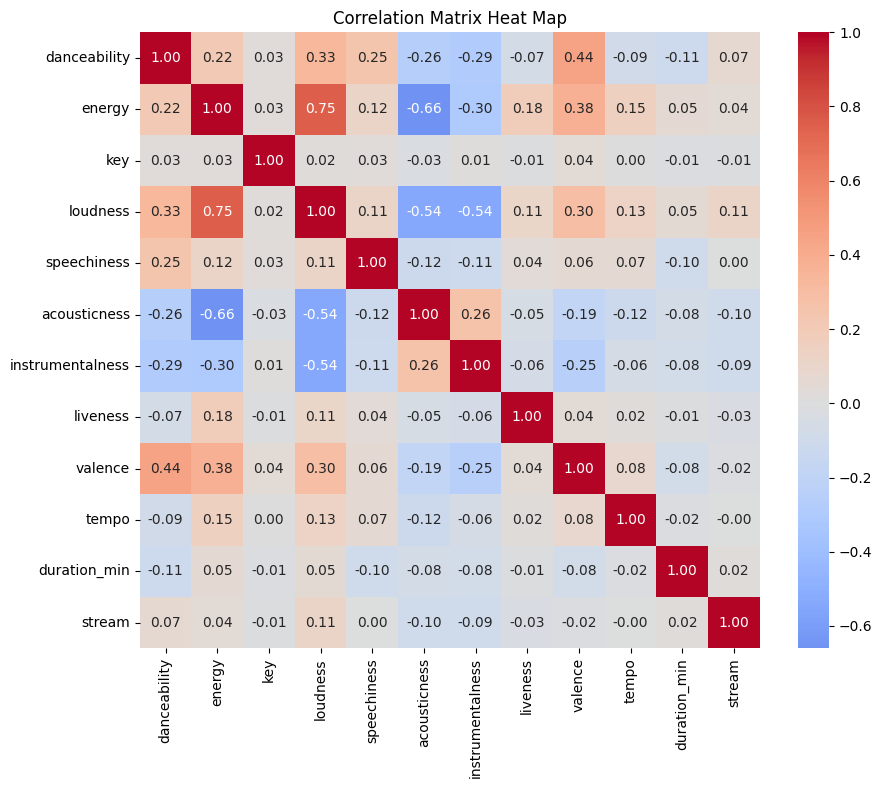

In [ ]:
#построим матрицу корреляций
corr_matrix = spotify_numeric.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center = 0, fmt = ".2f")
plt.title("Correlation Matrix Heat Map")
plt.show()

**Вывод:**

Из матрицы видим, что у нас не так много зависимостей между данными.
Пока наблюдается сильная положительная корреляция между `energy` и `loudness` (0.75), что означает, что песни с более высокой энергией можно считать более громкими.

Напротив, `loudness` и `acousticness` коррелируют сильно отрицательно (-0.54). Это означает, что более громкие треки, как правило, менее акустические. Также мы наблюдаем сильную отрицательную корреляцию между `energy` и `acousticness` (-0.66). Исходя из этого, мы можем сделать вывод, что энергичные песни далеки от акустических, и матрица подтверждает эту идею.

`instrumentalness` и `acousticness` (0.26) положительно коррелируют. Это означает, что акустические треки более инструментальные.

`valence` и `danceability` положительно коррелируют, т.е более позитивные треки более танцевальные.

Но наша главная задача понять зависимость нашей целевой переменной - количества стримов - от других факторов. На текущий момент, эта корреляции почти нет.


### 7. Визуализируйте данные (например, с помощью matplotlib и seaborn).

- постройте гистограммы распределения числовых переменных
- проверьте попарные связи переменных друг с другом (например, с помощью scatterplot) и с целевой переменной
- для категориальных переменных постройте столбчатые диаграммы

#### 7.1 Постройте гистограммы распределения числовых переменных

Так как у нас разные масштабы цифр, то возьмем для значений М - миллион, B - миллиард, и создадим функцию, которая отрисует распределение числовых столбцов

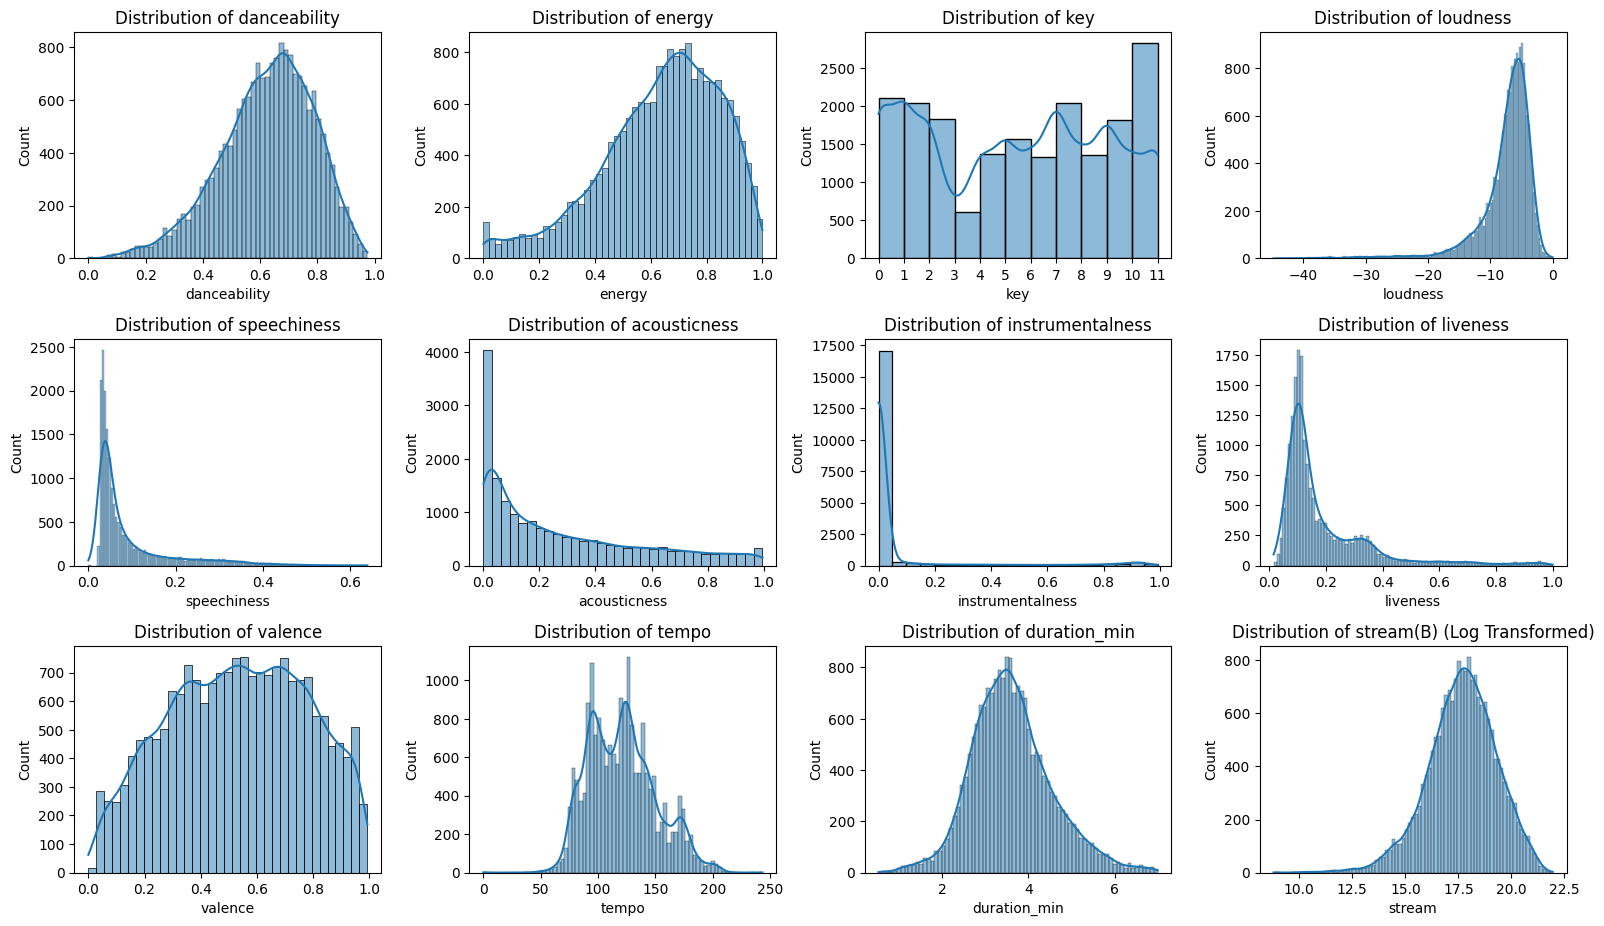

In [ ]:
# #распределение числовых столбцов

def get_scale_title(col_data, col_name):
    max_val = col_data.max()
    if max_val >= 1e9:
        scale = '(B)'
    elif max_val >= 1e6:
        scale = '(M)'
    else:
        scale = ''
    return f'{col_name}{scale}'

data_log = spotify_numeric.apply(lambda x: np.log1p(x) if x.max() > 1e5 else x)

plt.figure(figsize = (16, 12))
for i, col in enumerate(data_log, 1):
    plt.subplot(4, 4, i)

    if col == 'instrumentalness':
        sns.histplot(spotify_numeric[col], kde = True, binwidth = 0.05)
        plt.ylim(0, 18000)
    elif col == 'key':
        sns.histplot(spotify_numeric[col], kde = True, binwidth = 1)
        plt.xticks(range(12))
    else:
        sns.histplot(data_log[col], kde=True)

    title = get_scale_title(spotify_numeric[col], col)
    plt.title(f'Distribution of {title} (Log Transformed)' if spotify_numeric[col].max() > 1e5 else f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Из графиков можно сделать следующие выводы:
- У таких переменных как `danceability`, `energy`, `key`, `valence` и `tempo ` распределение близко к норммальному или немного скошено вправо.
- У `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness` и `stream` распределение имеет перекос в ту или иную сторону, что говорит о неоднородности данных и о преобладании треков с определенными характеристиками.
- Переменная Stream имеет крайне неравномерное распределение, что говорит о наличии "хитов", которые сильно выделяются на фоне остальных треков.

#### 7.2 Проверьте попарные связи переменных друг с другом (например, с помощью scatterplot) и с целевой переменной

Проверим связи с целевой переменной `stream`

In [ ]:
# прологарифмируем переменную stream

spotify_numeric['stream_log'] = np.log1p(spotify_numeric['stream'])

In [ ]:
# удалим столбцы 'stream' и 'stream_log', так как нам нужно визуализировать взаимосвязь других
# числовых столбцов с 'stream_log' и построим график

num_cols = spotify_numeric.columns.tolist()
num_cols.remove('stream')
num_cols.remove('stream_log')

plt.figure(figsize=(24, 18))
rows = 3
cols = 4

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=col, y='stream_log', data=spotify_numeric)
    plt.title(f'{col} vs. stream (log transformed)')

plt.tight_layout()
plt.suptitle('Попарные связи  с целевой переменной', y=1.02)
plt.show()

Исходя из графиков, были выявлены следующие выводы:

*Умеренная положительная связь:*
- `loudness`

*Слабые положительные связи:*
- `danceability`, `energy`, `valence`, `tempo`

*Слабая отрицательная связь:*
- `acousticness`

*Отсутствие явной связи:*
- `key`, `speechiness`, `instrumentalness`, `liveness`, `duration_min`

Предположения:

- Громкость может потенциальным фактором для привлечения внимания слушателей.
- Танцевальная, энергичная и позитивная музыка может быть более популярной, так как она часто ассоциируется с развлечениями и отдыхом.
- Акустическая музыка может быть менее популярной, так как она часто ассоциируется с более спокойным и нишевым жанром.
- Тональность, речевая составляющая, инструментальность, вероятность живого исполнения и длительность трека могут быть менее важными факторами для определения количества стримов.

Проверим связи переменных друг с другом с помощью графика:

In [ ]:
# построим график с попарными связями числовых переменных

sns.pairplot(spotify_numeric[num_cols])
plt.suptitle('Попарные связи между числовыми переменными', y=1.02, fontsize = 12)
plt.show()

На графиках видим следующие зависимости:

*Сильные корреляции:*
- `energy` и `loudness`: Громкие треки обычно энергичные.
- `energy` и `acousticness` : Акустические треки, как правило, менее энергичные.
- `loudness` и `acousticness` : Акустические треки, как правило, тихие.

*Слабые корреляции:*
Большинство остальных переменных имеют слабые корреляции друг с другом.

*Отсутствие явных зависимостей:*
`key`, `speechiness`, `instrumentalness`, `liveness`, `tempo` и `duration_min` не имеют сильных зависимостей с другими переменными.

#### 7.3 Для категориальных переменных постройте столбчатые диаграммы

В категориальные переменные входят `artist`, `track`, `album`, `album_type`.

Так как у всех переменных, кроме `album_type`, большое количество уникальных значений, то мы для графика возьмем как раз `album_type`. Ранее мы удаляли один тип альбома - compilation, так как он содержал совмещенные длинные треки.

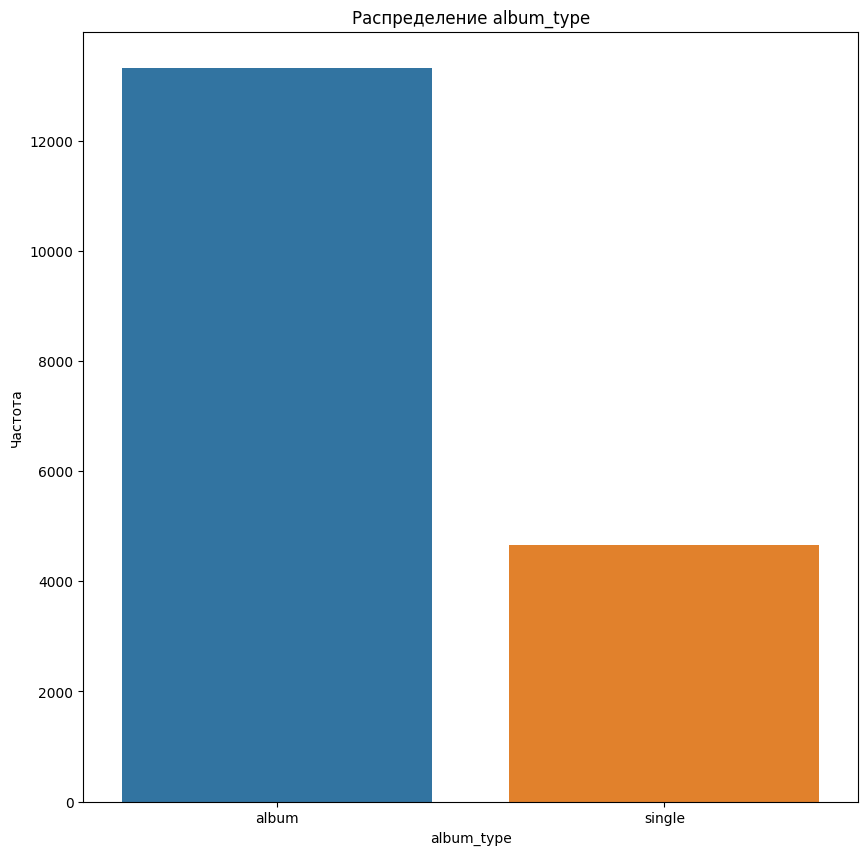

In [ ]:
# построим график с категориальной переменной "album_type"

plt.figure(figsize=(10,10))
sns.countplot(x='album_type', hue='album_type', dodge=False, data=spotify)
plt.title('Распределение album_type')
plt.xlabel('album_type')
plt.ylabel('Частота')
plt.show()

Данный график приводит к следующим выводам:

1) В данных значительно больше треков, выпущенных в формате альбомов, чем синглов. Это может отражать общую тенденцию в музыкальной индустрии, где альбомы остаются основным форматом выпуска музыки.

2) Разница между количеством альбомов и синглов весьма существенна. Это может указывать на то, что создание и выпуск альбома является более распространенной практикой среди исполнителей, чем выпуск отдельных синглов.

3) Возможные причины большего количества альбомов:
- альбомы могут предоставлять исполнителям больше возможностей для творческого самовыражения и создания целостных музыкальных произведений.
- альбомы могут быть более коммерчески выгодными, так как они содержат больше треков и могут продаваться по более высокой цене.


### 8. Дополнительные проверки взаимосвязей

Сгруппируем композиции по исполнителям, подсчитав количество композиций и альбомов на исполнителя, остальные показатели возьмем средним:

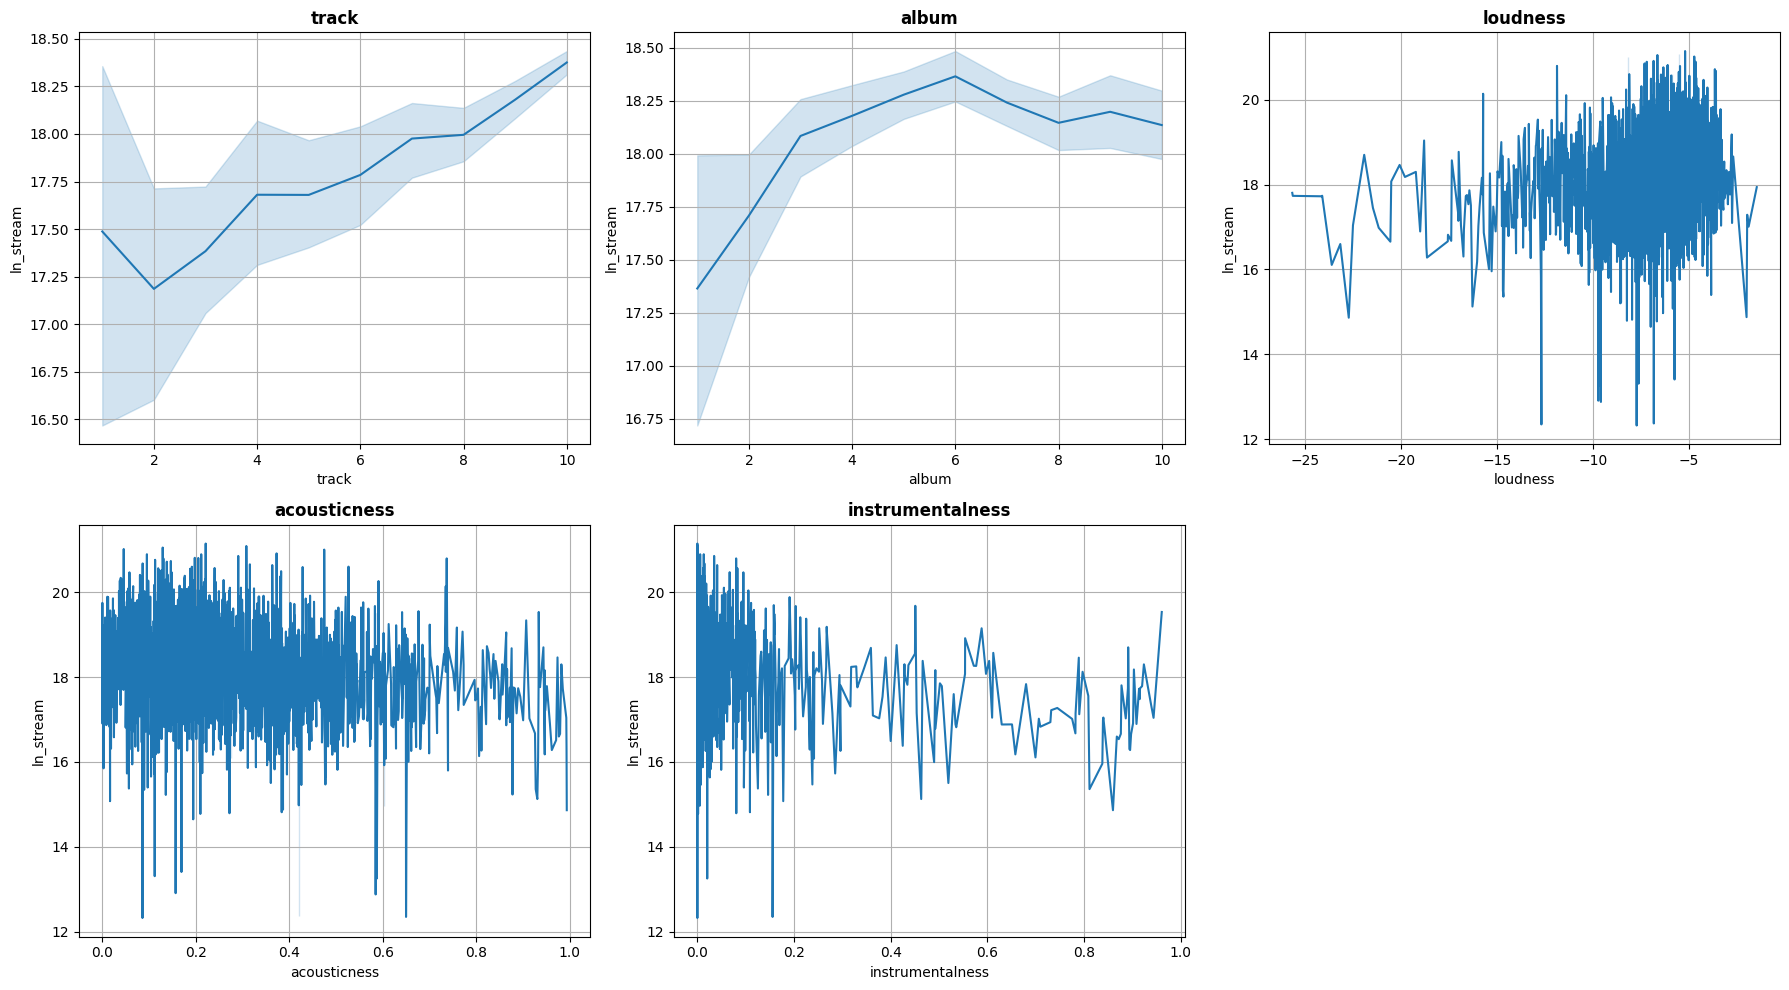

In [ ]:
# Функция для создания логарифмированного столбца

def log_col(col):
    import math
    log_arr = []
    for a in col:
        if a != 0:
            log_arr.append(math.log(a))
        else:
            log_arr.append(np.nan)
    return log_arr

spotify_groupped = spotify.groupby(['artist'], as_index = False).agg({'track': 'nunique', 'album': 'nunique',
                                                                                  'danceability': 'mean',
                                                                                  'energy': 'mean',
                                                                                  'key': 'mean',
                                                                                  'loudness': 'mean',
                                                                                  'speechiness': 'mean',
                                                                                  'acousticness': 'mean',
                                                                                  'instrumentalness': 'mean',
                                                                                  'liveness': 'mean',
                                                                                  'valence': 'mean',
                                                                                  'valence': 'mean',
                                                                                  'tempo': 'mean',
                                                                                  'duration_min': 'mean',
                                                                                  'stream': 'mean'})
spotify_groupped['ln_stream'] = log_col(spotify_groupped['stream'])
cols = ['track', 'album', 'loudness', 'acousticness', 'instrumentalness']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(cols):
    row = i // 3  # Вычисляем номер строки
    col_num = i % 3  # Вычисляем номер столбца
    sns.lineplot(data=spotify_groupped, x=col, y='ln_stream', ax=axes[row, col_num])
    axes[row, col_num].set_title(col, fontdict={'weight': 'bold'})
    axes[row, col_num].grid(True)

# Удаляем лишний подграфик, если количество столбцов не делится на 3
if len(cols) < 6:
    fig.delaxes(axes[1, len(cols) % 3])

plt.tight_layout()
plt.show()

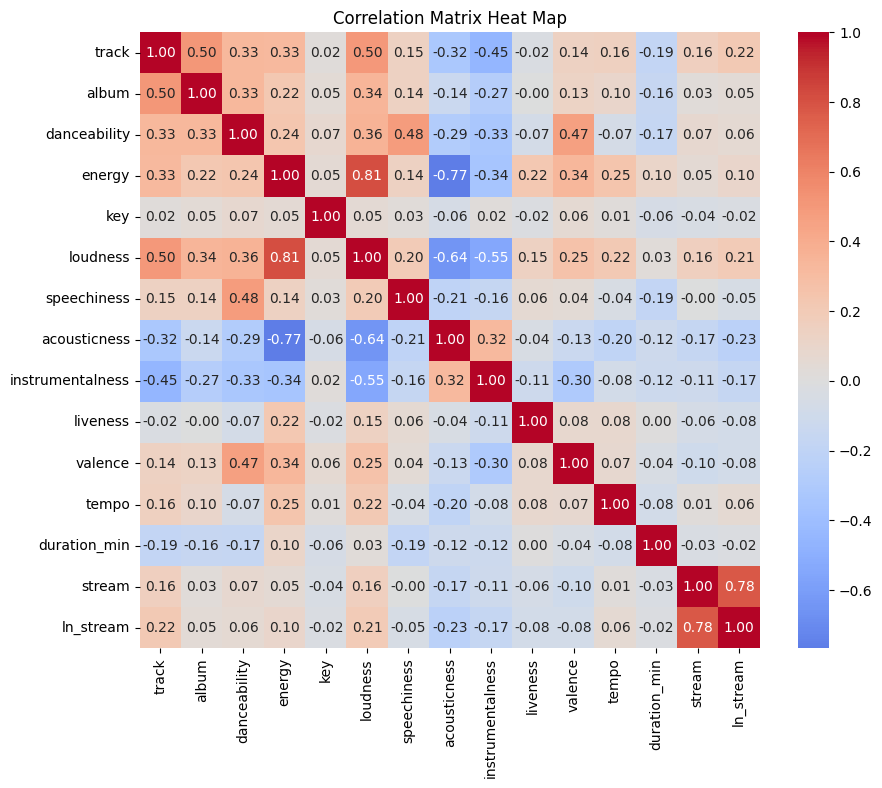

In [ ]:
#построим матрицу корреляций
corr_matrix = spotify_groupped.drop('artist', axis = 1).corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center = 0, fmt = ".2f")
plt.title("Correlation Matrix Heat Map")
plt.show()

**После группировки по артистам наблюдается слабая корреляция логарифма среднего количества прослушиваний:**

* С переменной **`track`** - количеством композиций у исполнителя (22%)
* С переменной **`loudness`** - средней громкостью композиций исполнителя (21%)
* С переменной **`acousticness`** (-23%)
* С переменной **`instrumentalness`** (-17%)


1) Положительная корреляция между количеством композиций у исполнителя и логарифмом среднего количества прослушиваний может объясняться одним из следующих тезисов:

* Чем больше прослушиваний у исполнителя, тем больше композиций он выпускает, поскольку его мотивация растет
* Чем больше композиций у артиста на площадках, тем больше шансов набрать прослушивания
* В выборке могут присутствовать состоявшиеся артисты с большим количеством композиций и прослушиваний, при этом новые исполнители будут иметь меньшее количество и композиций и прослушиваний, из-за чего возникает корреляция.

2) В силу технических особенностей процесса сведения музыкальной композиции, для того, чтобы трек звучал громко и сбалансированно, нужны либо хорошее оборудование и навыки сведения, либо услуги профессиональных специалистов и студий.
* Теоретически может наблюдаться положительная корреляция из-за того, что более громкие треки - более качественные
* Также, более тихие композиции проседают по громкости и сбалансированности на фоне остальных, из-за чего слушатели могут их пропускать.

3) Корреляция с переменными **`acousticness`** и **`instrumentalness`** может объясняться тем, что в выборке большее количество композиций (в т.ч. популярные) имеют более низкие значения этих признаков.

### Выводы

*Что было выявлено во время EDA анализа:*

1) Датасет содержал в себе неактуальные для нас данные - аудиокниги, треки с белым шумом, соединенные длинные треки - все это могло привести к некорректному дальнейшему анализу данных. Такие выбросы были исключены. Из 20 718 строк осталось после чистки 17 968.

2) Возможные причины пропусков:

- Spotify может не предоставлять данные о прослушиваниях для всех песен, особенно для менее популярных или более старых треков.

- Возможно, есть региональные ограничения, из-за которых данные о прослушиваниях не собираются в некоторых странах.

- Также возможно, что некоторые песни просто не были доступны для прослушивания на Spotify в определенные периоды времени.

- Ошибки при сборе данных: возможно, произошли сбои в процессе сбора информации с API Spotify.

- Изменения в API Spotify: Spotify мог изменить способ предоставления данных о прослушиваниях, что могло привести к пропускам в ранее собранных данных.

- Spotify может не раскрывать точные цифры прослушиваний для некоторых песен из-за соглашений с лейблами или артистами.

- Возможно, существуют ограничения на доступ к данным о прослушиваниях для определенных типов аккаунтов или регионов.

3) Все поля в датасете соответствовали своим типам, но мы решили улучшить типы данных части полей (stream и key) и привести к целочисленным значениям для дальнейшего удобства анализа.

4) В целом, датасет содержит разнообразные треки с точки зрения танцевальности, энергии, громкости, вокала, акустики, инструментальности, живости, позитивности, темпа и длительности.

5) В датасете нет дубликатов.

6) Были удалены треки с белым шумом, аудиокниги, треки с типом альбом compilation, треки длительностью более 7 минут, данные из поля loudness, которые выходили за рамки диапазона значений. Также с помощью боксплота были выявлены выбросы и удалены в таких полях, как `duration_min`, `energy`, `danceability`, `tempo`.

7) Целевая переменная `stream` не имеет сильной связи с другими переменными.

8) При группировке датасета по артистам наблюдается слабая корреляция логарифма среднего количества прослушиваний с количеством треков у артиста, громкостью, акустичностью и инструментальностью композиций.

*Что нужно проверить на следующем шаге:*

1) Выделить новый признак - факт наличия приглашенного исполнителя для совместного трека (feat), и посмотреть, будет ли зависимость с другими признаками у таких треков.

2) Проверить корреляцию между связками параметров - например, `energy` + `loudness` + `stream`.

## Часть 3. Проверка гипотез

Проверим гипотезу о наличии взаимосвязи между фактом присутствия приглашённого артиста на треке и количеством прослушиваний.

Нулевая гипотеза: нет связи между фактом наличия приглашённого артиста в треке и количеством прослушиваний.

Альтернативная гипотеза: есть связь между фактом наличия приглашённого артиста в треке и количеством прослушиваний.

Найдём, как обозначается приглашённый артист.

In [ ]:
spotify[spotify.track.str.contains('feat.', regex=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,63063467,3.585833
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,4,-7.185,0.0629,0.01200,0.262000,0.3250,0.358,127.030,10666154,4.569033
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,11,-5.886,0.0313,0.00799,0.081000,0.1120,0.462,140.158,159605929,3.492667
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,2,-3.340,0.0465,0.00343,0.103000,0.3250,0.643,120.012,42671901,3.562500
27,50 Cent,Is This Love ('09) (feat. 50 Cent),Curtain Call 2,album,0.853,0.776,8,-4.221,0.2610,0.07140,0.000000,0.1810,0.659,94.028,28529840,3.533550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231,Gazo,BODIES (feat. Damso),KMT,album,0.906,0.518,1,-7.104,0.1800,0.00864,0.001740,0.0711,0.259,146.060,25492899,2.772883
20232,Gazo,MAUVAIS 2X (feat. Ninho),MAUVAIS 2X (feat. Ninho),single,0.736,0.666,0,-7.851,0.2550,0.36000,0.000000,0.0881,0.744,138.656,51663165,4.006217
20343,MEDUZA,Bad Memories (feat. Elley Duhé & FAST BOY),Bad Memories (feat. Elley Duhé & FAST BOY),single,0.607,0.767,5,-6.069,0.0474,0.11800,0.000000,0.1220,0.662,123.998,149174546,2.477150
20344,MEDUZA,Paradise (feat. Dermot Kennedy),Paradise,single,0.632,0.595,8,-7.644,0.0401,0.06890,0.000000,0.2090,0.435,124.114,601107554,2.798383


In [ ]:
spotify[spotify.track.str.contains('ft.', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
223,2Pac,All Eyez On Me (ft. Big Syke),All Eyez On Me,album,0.872,0.723,1,-5.968,0.2470,0.0293,0.000000,0.3270,0.843,93.279,428728611,5.129550
228,2Pac,2 Of Amerikaz Most Wanted (ft. Snoop Doggy Dogg),All Eyez On Me,album,0.849,0.904,8,-4.780,0.1380,0.0248,0.000051,0.0545,0.854,99.258,178709066,4.108883
329,21 Savage,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,album,0.849,0.424,5,-9.579,0.3240,0.0635,0.000000,0.0834,0.153,145.887,501420741,4.049433
3707,Los Auténticos Decadentes,Loco (Tu Forma de Ser) [Ft. Rubén Albarrán] - ...,Fiesta Nacional (Mtv Unplugged),album,0.587,0.639,7,-8.065,0.0357,0.3950,0.000000,0.6800,0.789,116.499,148463447,4.155117
3710,Los Auténticos Decadentes,Amor (Ft. Mon Laferte) - MTV Unplugged,Fiesta Nacional (Mtv Unplugged),album,0.620,0.717,9,-7.165,0.0361,0.0274,0.000000,0.7080,0.601,92.881,122943312,5.208533
8922,Damian Marley,"Medication (ft. Stephen Marley, Wiz Khalifa, T...",Medication (Remix),single,0.813,0.585,10,-6.856,0.2660,0.0223,0.000000,0.2100,0.847,84.995,35643208,4.085783
9656,Rick Ross,Money In The Grave (Drake ft. Rick Ross),The Best In The World Pack,single,0.831,0.502,10,-4.045,0.0460,0.1010,0.000000,0.1220,0.101,100.541,826816158,3.423783
11431,Ñengo Flow,La Llevo Al Cielo (Ft. Ñengo Flow),La Llevo Al Cielo (Ft. Ñengo Flow),single,0.795,0.845,9,-3.809,0.1350,0.1050,0.000011,0.1720,0.769,170.023,261092249,4.248667
12082,Steve Aoki,New York ft. mazie,New York ft. mazie,single,0.409,0.760,6,-5.291,0.2640,0.2860,0.000003,0.0807,0.601,103.909,2270706,2.203800
13508,Drake,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,album,0.849,0.424,5,-9.579,0.3240,0.0635,0.000000,0.0834,0.153,145.887,501420741,4.049433


In [ ]:
spotify[spotify.track.str.contains('(with', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
134,Pharrell Williams,"Stay With Me (with Justin Timberlake, Halsey &...",Funk Wav Bounces Vol. 2,album,0.810,0.733,9,-6.338,0.0444,0.27600,0.000007,0.2880,0.900,125.975,99934776,3.821383
140,Khalid,lovely (with Khalid),lovely (with Khalid),single,0.351,0.296,4,-10.109,0.0333,0.93400,0.000000,0.0950,0.120,115.284,2110573779,3.336433
144,Khalid,Eastside (with Halsey & Khalid),FRIENDS KEEP SECRETS,album,0.632,0.686,6,-7.665,0.2430,0.54900,0.000000,0.2000,0.329,89.949,1424962511,2.846167
149,Khalid,Love Lies (with Normani),Love Lies (with Normani),single,0.708,0.648,6,-5.626,0.0449,0.09560,0.000000,0.1340,0.338,143.955,843423744,3.361783
160,Machine Gun Kelly,my ex's best friend (with blackbear),Tickets To My Downfall,album,0.731,0.675,5,-5.134,0.0434,0.00473,0.000000,0.1410,0.298,124.939,574531280,2.324350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20532,BoyWithUke,Sick of U (with Oliver Tree),Sick of U,single,0.676,0.814,0,-3.213,0.0585,0.27700,0.000000,0.0953,0.601,92.554,44129835,2.811267
20535,BoyWithUke,IDGAF (with blackbear),Serotonin Dreams,album,0.782,0.728,5,-5.930,0.0768,0.42700,0.000000,0.2500,0.876,97.975,152547498,2.344450
20540,BoyWithUke,Prairies (with mxmtoon),Serotonin Dreams,album,0.717,0.700,1,-5.843,0.0382,0.18900,0.000000,0.3740,0.568,103.517,21156648,3.199550
20571,Silk Sonic,After Last Night (with Thundercat & Bootsy Col...,An Evening With Silk Sonic,album,0.651,0.703,0,-8.958,0.0816,0.02970,0.000000,0.0608,0.647,140.051,94525595,4.157400


In [ ]:
spotify[spotify.artist.str.contains(',', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
1618,"Earth, Wind & Fire",Let's Groove,Raise!,album,0.869,0.648,11,-8.698,0.0633,0.12100,0.000022,0.1260,0.900,125.035,430077729,5.655333
1619,"Earth, Wind & Fire",Boogie Wonderland,I Am,album,0.802,0.756,2,-10.791,0.0349,0.08430,0.007650,0.0521,0.963,131.715,343817778,4.804883
1620,"Earth, Wind & Fire",After the Love Has Gone,I Am,album,0.424,0.443,6,-13.450,0.0382,0.53200,0.000389,0.6730,0.391,131.675,112553060,4.634000
1622,"Earth, Wind & Fire",Shining Star,That's The Way Of The World,album,0.676,0.692,9,-13.093,0.0520,0.66800,0.009150,0.1300,0.799,102.516,82024994,2.836000
1623,"Earth, Wind & Fire","September - from DreamWorks Animation's ""TROLLS""",TROLLS (Original Motion Picture Soundtrack),album,0.774,0.849,9,-2.986,0.0301,0.01600,0.000199,0.0348,0.962,126.996,73117976,3.916667
1624,"Earth, Wind & Fire",Beijo (Interlude),All 'N All,album,0.841,0.752,11,-11.165,0.0898,0.24800,0.006800,0.1050,0.549,112.362,8234500,1.335783
1625,"Earth, Wind & Fire",Fantasy,All 'N All,album,0.608,0.745,4,-8.772,0.0857,0.32300,0.004280,0.1350,0.614,88.941,23604673,4.623550
1626,"Earth, Wind & Fire",In the Stone,I Am,album,0.656,0.662,4,-10.346,0.0493,0.09640,0.000612,0.0853,0.717,114.612,25001079,4.808000
5801,"Hank Williams, Jr.",Family Tradition,Family Tradition,album,0.660,0.523,4,-12.068,0.0608,0.02380,0.000000,0.1420,0.794,126.342,121920128,4.049333
5802,"Hank Williams, Jr.",A Country Boy Can Survive,The Pressure Is On,album,0.688,0.459,7,-9.353,0.0365,0.14400,0.000000,0.0816,0.493,75.184,128648571,4.250000


Видим, что в нашем датасете приглашённые артисты как правило указываются в названии трека через варианты сокращений слова featuring (от англ. "с участием"): "feat." и "ft.".

Также в ряде случаев приглашённый артист указывается через "with", однако само по себе слово "with" в английском языке может быть использовано в разных контекстах, а не только как обозначение приглашённого артиста, поэтому также заметим, что приглашённый артист через "with" обычно прописывается в скобках.

Основываясь на найденных закономерностях, добавим в наш датасет поле `is_feat`, которое будет принимать значения 0 либо 1 в зависимости от наличия приглашённого артиста в песне.

In [ ]:
condition = (spotify['track'].str.contains('feat.', regex=False, case=False)
             | spotify['track'].str.contains('ft.', regex=False, case=False)
             | spotify['track'].str.contains('(with', regex=False, case=False))

spotify['is_feat'] = condition.astype(int)

spotify[spotify.is_feat == 1]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min,is_feat
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,63063467,3.585833,1
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,4,-7.185,0.0629,0.01200,0.262000,0.3250,0.358,127.030,10666154,4.569033,1
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,11,-5.886,0.0313,0.00799,0.081000,0.1120,0.462,140.158,159605929,3.492667,1
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,2,-3.340,0.0465,0.00343,0.103000,0.3250,0.643,120.012,42671901,3.562500,1
27,50 Cent,Is This Love ('09) (feat. 50 Cent),Curtain Call 2,album,0.853,0.776,8,-4.221,0.2610,0.07140,0.000000,0.1810,0.659,94.028,28529840,3.533550,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,BoyWithUke,IDGAF (with blackbear),Serotonin Dreams,album,0.782,0.728,5,-5.930,0.0768,0.42700,0.000000,0.2500,0.876,97.975,152547498,2.344450,1
20540,BoyWithUke,Prairies (with mxmtoon),Serotonin Dreams,album,0.717,0.700,1,-5.843,0.0382,0.18900,0.000000,0.3740,0.568,103.517,21156648,3.199550,1
20571,Silk Sonic,After Last Night (with Thundercat & Bootsy Col...,An Evening With Silk Sonic,album,0.651,0.703,0,-8.958,0.0816,0.02970,0.000000,0.0608,0.647,140.051,94525595,4.157400,1
20635,Arcane,Enemy (with JID) - from the series Arcane Leag...,Mercury - Acts 1 & 2,album,0.728,0.783,11,-4.424,0.2660,0.23700,0.000000,0.4340,0.555,77.011,1046179886,2.889683,1


Итого 1987 треков с хотя бы одним приглашённым артистом в датасете. Проведём двухвыборочный Т-тест для сравнения средних. Используем поправку Уэлча, т.к. не считаем, что дисперсии двух сравниваемых групп равны.

In [ ]:
from scipy import stats as st

results = st.ttest_ind(spotify[spotify['is_feat'] == 1].stream,
                       spotify[spotify['is_feat'] == 0].stream, equal_var=False)

print(f"{results.pvalue:.4f}")

0.0000


p-value < 0.05, следовательно средние групп совместных и сольных треков имеют стат. значимые различия.

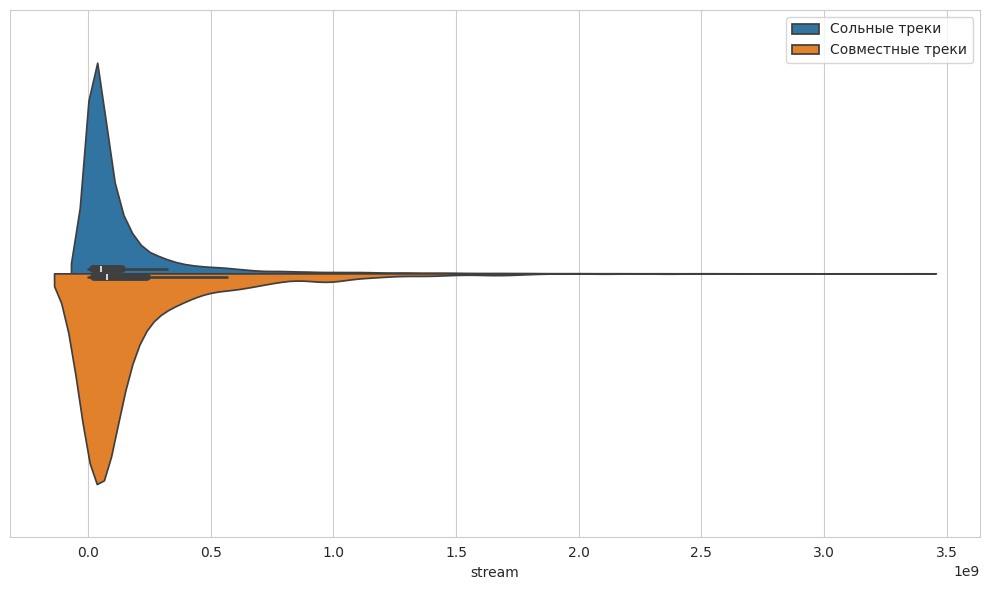

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.violinplot(data=spotify, x='stream', hue='is_feat', split=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Сольные треки', 'Совместные треки'])

plt.tight_layout()
plt.show()

Видим, что группы средних пересекаются, однако у совместных треков присутствует продолжительный хвост справа, за счёт которого и появляется статистичиски значимая разница между средними этих групп. Проверим абсолютные значения средних.

In [ ]:
print("Среднее для is_feat=1:", spotify[spotify['is_feat'] == 1].stream.mean())
print("Среднее для is_feat=0:", spotify[spotify['is_feat'] == 0].stream.mean())

Среднее для is_feat=1: 207036871.41217917
Среднее для is_feat=0: 135830489.9405544


Вывод: среднее число прослушиваний треков с приглашённым артистом статистически значимо выше, чем у сольных треков. Проверим коэффициент корреляции для выявления факта взаимосвязи между этими факторами.

In [74]:
from scipy.stats import pointbiserialr

r, p_value = pointbiserialr(spotify['is_feat'], spotify['stream'])

print(f"Корреляция: {r:.3f}, p-value: {p_value:.4f}")

Корреляция: 0.088, p-value: 0.0000


p-value < 0.05, следовательно отклоняем нулевую гипотезу и принимаем альтернативную: есть связь между фактом наличия приглашённого артиста в треке и количеством прослушиваний. Связь слабая (0.088) со знаком +. Возможно, носит нелинейный характер.